# **Chapter 1: Introduction**

# **Chapter 2: Project Source Code**

## **Package 1: Data**

### **Module 1: objects**

The following code aims to define the various types of patterns and images that can be generated using the Chromatix library. The authors of this library have implemented three functions that facilitate the creation of specific visual outputs: radial patterns, phase patterns, and grayscale images.

#### **Imports**

*Source Code*

In [4]:
import imageio
import jax.numpy as jnp
import matplotlib.pyplot as plt
from skimage import img_as_ubyte

*Explanation*

To create the necessary functions, four key libraries are imported:

1. `imageio`: A versatile tool for reading (input) and saving (output) images in various formats. When an image is read using ' imageio ', it is stored as an array, allowing for easy manipulation and processing.
2. `jax.numpy`: Part of the JAX library, this module extends NumPy by enabling automatic differentiation and allows code execution on GPUs and TPUs. It's ideal for performing array operations while leveraging the power of automatic differentiation.
3. `matplotlib.pyplot`: A widely used plotting library in Python that provides a Matlab-like interface for creating static, animated, and interactive visualizations.
4. `img_as_ubyte` (from `skimage`): A function that converts images to an unsigned byte format (0-255). This is essential for ensuring your data is in the correct format for display or saving.

#### **Function 1: creat_radial_pattern**

*Source Code*

In [5]:
def create_radial_pattern(shape):
    """
    Create a basic radial pattern image.

    Args:
        shape (tuple): Shape of the image (height, width).

    Returns:
        jnp.ndarray: Radial pattern image.
    """
    # Create a grid of coordinates
    y, x = jnp.indices(shape)

    # Calculate the center of the image
    center_y, center_x = shape[0] // 2, shape[1] // 2

    # Compute the distances from the center
    distances = jnp.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)

    # Normalize distances to range [0, 2*pi] for phase pattern
    max_distance = jnp.sqrt(center_x**2 + center_y**2)
    phase_pattern = (distances / max_distance) * 2 * jnp.pi

    return phase_pattern

*Explanation*

In Python, the keyword `def` is used to define a function, which is a reusable block of code designed to perform a specific task. In this context, the author defines a function named `create_radial_pattern` with an argument `shape` that can be passed when calling the function.

The docstring, located between the two sets of triple quotation marks, explains the purpose, arguments, and return value of this function. It indicates that the function is used to create a basic radial pattern image, and the return value (output) will be an array.

The argument `shape` is expected to be a tuple with two elements. A tuple is a built-in data structure in Python used to store an ordered collection of items, defined by placing a comma-separated sequence of elements within parentheses. Tuples are immutable, meaning that once they are created, their elements cannot be changed, added, or removed.

In [6]:
# Example:
shape = (4, 6) # height is 4, and width is 6

The first line of this function creats a grid of coordinate indices using `y, x = jnp.indices(shape)`. This function returns two arrays named $y$ and $x$ respectively.

In [7]:
# Example
y, x = jnp.indices(shape) # shape = (4, 6)

print('y=', y)
print('x=', x)

y= [[0 0 0 0 0 0]
 [1 1 1 1 1 1]
 [2 2 2 2 2 2]
 [3 3 3 3 3 3]]
x= [[0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]
 [0 1 2 3 4 5]]


In this context, the $y$ array corresponds to the row indices (e.g., 4 rows: 0, 1, 2, 3), and the $x$ array corresponds to the column indices (e.g., 6 columns: 0, 1, 2, 3, 4, 5).

Since the function's purpose is to create radial patterns, it's necessary to determine the center of the coordinate grid. The author calculates the center's indices using `shape[0]//2` and `shape[1]//2`. 

Here, `shape[0]` and `shape[1]` return the first and second elements of the shape tuple, respectively. The operator `$//$` is used for floor division, which means it divides the number and then rounds down to the nearest integer. Thus, for our example, `center_y` and `center_x` would be 2 and 3, respectively.

To normalize the distance to range [0, $2\pi$], the code first calculates the distances between all points and the center using `jnp.sqrt()`, which returns the square roots of the input values. The mathematical equation used here is: 

$$ distance=\sqrt{(x-x_{center})^2+(y-y_{center})^2} \tag{2.1.1}$$

Since both $x$ and $y$ are arrays, the resulting $distance$ is also an array. This array contains the distances from each point in the grid to the center, which will be used to generate the radial pattern.

In [8]:
# Calculate the position of the center.
center_y, center_x = shape[0]//2, shape[1]//2 

# Calculate the distances between all other points and the center.
distance = jnp.sqrt((x - center_x)**2 + (y - center_y)**2) 

print('distance =\n', distance)

distance =
 [[3.6055512 2.828427  2.236068  2.        2.236068  2.828427 ]
 [3.1622777 2.236068  1.4142135 1.        1.4142135 2.236068 ]
 [3.        2.        1.        0.        1.        2.       ]
 [3.1622777 2.236068  1.4142135 1.        1.4142135 2.236068 ]]


As observed in the result above, the calculated center isn't exactly at the geometric center of the coordinate grid due to the use of floor division. This rounding down places the center slightly off from the true midpoint. However, with larger height and width values, this discrepancy becomes negligible.

Next, the code calculates `max_distance`, which represents the distance from the center to the origin of the coordinate grid (i.e., the top-left corner at (0, 0)). This value serves as a reference for normalizing other distances within the grid.

Finally, the `phase_pattern` is calculated using the equation: 

$$phase=2\pi \times \frac{distance}{maxdistance} \tag{2.1.2}$$

By applying this equation, the function generates an array where each element represents the phase at that point in the grid, normalized to the range $[0, 2\pi]$. This array is the output of the function.

In [9]:
# Calculate the maximal distance which is from the center to the left-top point.
max_distance = jnp.sqrt(center_x**2 + center_y**2) 

# Normalize the distance to the range [0, 2*pi].
phase_pattern = (distance / max_distance) * 2 * jnp.pi 

print('max_distance=', max_distance)
print('phase_pattern =\n', phase_pattern)

max_distance= 3.6055512
phase_pattern =
 [[6.2831855 4.928936  3.8966663 3.4852843 3.8966663 4.928936 ]
 [5.5107183 3.8966663 2.464468  1.7426422 2.464468  3.8966663]
 [5.2279267 3.4852843 1.7426422 0.        1.7426422 3.4852843]
 [5.5107183 3.8966663 2.464468  1.7426422 2.464468  3.8966663]]


As observed in the results above, the first element ' 6.2831855 ' corresponds to $2\pi$, while all other elements are values smaller than $2\pi$ and larger than 0. This confirms that all elements in the array are normalized within the range $[0, 2\pi]$

#### **Function 2: save_phase_pattern**

*Source Code*

In [10]:
def save_phase_pattern():
    # Create the radial pattern
    shape = (512, 512)
    radial_pattern = create_radial_pattern(shape)

    # Save the pattern as a PNG file
    plt.imshow(radial_pattern, cmap="hsv")
    plt.colorbar()
    plt.title("Radial Phase Pattern")
    plt.axis("off")  # Hide the axis
    plt.savefig("data/radial_pattern.png", bbox_inches="tight", pad_inches=0)
    plt.show()

*Explanation*

As the name suggests, this function is designed to save and output the phase pattern generated by the first function.

The line `shape = (512, 512)` defines the dimensions of the pattern. Then, the line `radial_pattern = create_radial_pattern(shape)` calls the first function to create a radial phase pattern. This pattern is stored in the variable `radial_pattern` as a 512×512 array.

In [11]:
# Set the height and width as 512.
shape = (512, 512) 

# Call the function 'creat_radial_pattern()' to creat a redial pattern according the defined shape.
radial_pattern = create_radial_pattern(shape) 

print('radial_pattern =\n', radial_pattern)

radial_pattern =
 [[6.2831855 6.2709255 6.25869   ... 6.246479  6.25869   6.2709255]
 [6.2709255 6.2586417 6.246382  ... 6.2341466 6.246382  6.2586417]
 [6.25869   6.246382  6.234098  ... 6.2218385 6.234098  6.246382 ]
 ...
 [6.246479  6.2341466 6.2218385 ... 6.209554  6.2218385 6.2341466]
 [6.25869   6.246382  6.234098  ... 6.2218385 6.234098  6.246382 ]
 [6.2709255 6.2586417 6.246382  ... 6.2341466 6.246382  6.2586417]]


Then, to save and show the image, the library `matplotlib.pyplot` is applied.

`plt.imshow()` is a versatile tool for image visualization in Python. It converts scalar data in an array into colors based on a specified colormap, allowing for the visual representation of scalar values.

For instance, the line `plt.imshow(radial_pattern, cmap="hsv")` converts the scalar values in the `radial_pattern` array into a 2D image using the `hsv` colormap, which maps the data to hues corresponding to the HSV (Hue, Saturation, Value) color model. Besides `hsv`, there are many other colormaps available, such as `gray`, `coolwarm`, and more.

Additionally, `plt.imshow()` offers various parameters to customize the image, including options for interpolation, aspect ratio, transparency (`alpha`), and more, as shown in the code below. These parameters provide flexibility in how the data is visually presented.

Furthermore, you can enhance the figure by adding a colorbar, title, and controlling the axis using the commands `plt.colorbar()`, `plt.title()`, and `plt.axis()`.

To save the figure, the `plt.savefig()` function is used. The argument `data/radial_pattern.png` specifies the filename, format, and location where the file will be saved. The parameter ` \bbox_inches="tight"` ensures that the bounding box of the figure is tightly fitted around the actual content, minimizing any extra whitespace. Additionally, `pad_inches=0` specifies that no padding will be added around the figure, ensuring a clean and compact output.

Finally, `plt.show()` is required to display the figure on the screen. Without this command, the figure won't appear in script or non-interactive environments. It ensures that the visualization is rendered and visible to the user.

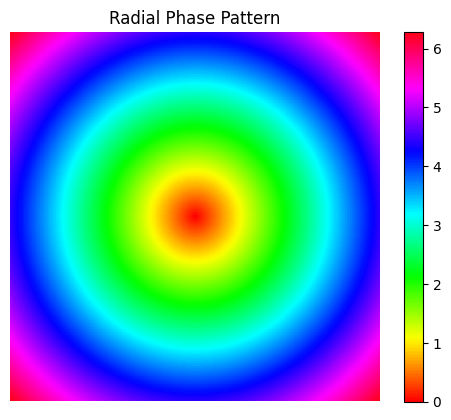

In [12]:
# Creat a figure of the array 'radial_pattern' according to the colormap "hsv", 
# setting interpolation as "nearest", aspect ratio as 1:1, and no transparency.
plt.imshow(radial_pattern, cmap="hsv", interpolation="nearest", aspect="equal", alpha=1)
plt.colorbar() # Show colorbar.
plt.title("Radial Phase Pattern") # Set a title.
plt.axis("off") # Hide the axis
# Save the figure as .png file in the folder 'data' without any extra whitespace
plt.savefig("data/radial_pattern.png", bbox_inches="tight", pad_inches=0) 
plt.show() # Show the figure

#### **Function 3: normalize_grayscale_image**

*Source Code*

In [13]:
def normalize_grayscale_image(input_path, output_path):
    # Read the image
    img = imageio.imread(input_path)

    # Normalize the grayscale image
    normalized_img = img / img.max()

    # Convert the normalized image to 8-bit unsigned integer format
    normalized_img_ubyte = img_as_ubyte(normalized_img)

    # Save the normalized grayscale image as a PNG
    imageio.imsave(output_path, normalized_img_ubyte)

*Explanation*

This function takes the following inputs:
1. `input_path` : The path to the input image file which should be a string.
2. `output_path` : The path to the output image file where the processed image should be saved, should be a string.

This function reads an image from a specified path, storing it as an array of values. The values are then normalized to the range $[0, 1]$ and converted to an unsigned byte format (0-255). Finally, the processed image is saved to another specified path. 

The line `img = imageio.imread(input_path)` reads an image from `input_path`. By narmalizing it, an array of values in the range $[0, 1]$ is output:

In [14]:
# The path leads to a grayscale image.
input_path = 'data/grayscale image.png' 

# Read the image as an array.
img = imageio.imread(input_path) 

# Normalized the array of the image to the range [0, 1].
normalized_img = img / img.max() 

print('normalized_img =\n', normalized_img)

normalized_img =
 [[[0.04526749 0.04526749 0.04938272]
  [0.04526749 0.04526749 0.04938272]
  [0.04526749 0.04526749 0.04938272]
  ...
  [0.04526749 0.04526749 0.04938272]
  [0.04526749 0.04526749 0.04938272]
  [0.04526749 0.04526749 0.04938272]]

 [[0.04526749 0.04526749 0.04938272]
  [0.0781893  0.08230453 0.08230453]
  [0.07407407 0.07407407 0.0781893 ]
  ...
  [0.90946502 0.90946502 0.90946502]
  [0.88065844 0.88065844 0.88477366]
  [0.85596708 0.8600823  0.8600823 ]]

 [[0.04526749 0.04526749 0.04938272]
  [0.07407407 0.07407407 0.07407407]
  [0.07407407 0.07407407 0.07407407]
  ...
  [0.93415638 0.93415638 0.9382716 ]
  [0.91358025 0.91358025 0.91358025]
  [0.88888889 0.88888889 0.88888889]]

 ...

 [[0.04526749 0.04526749 0.04938272]
  [0.91358025 0.91358025 0.91358025]
  [0.9382716  0.9382716  0.94238683]
  ...
  [0.06584362 0.06584362 0.06584362]
  [0.06995885 0.06995885 0.07407407]
  [0.07407407 0.07407407 0.07407407]]

 [[0.04526749 0.04526749 0.04938272]
  [0.91769547 0.917

C:\Users\shown\AppData\Local\Temp\ipykernel_4180\2356471255.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(input_path)


As abserved, the values are all normalized to the range $[0, 1]$ as expected.

In [15]:
# Convert the normalized image to 8-bit unsigned integer format(0-255).
normalized_img_ubyte = img_as_ubyte(normalized_img) 

print('normalized_img_ubyte =\n', normalized_img_ubyte)

normalized_img_ubyte =
 [[[ 12  12  13]
  [ 12  12  13]
  [ 12  12  13]
  ...
  [ 12  12  13]
  [ 12  12  13]
  [ 12  12  13]]

 [[ 12  12  13]
  [ 20  21  21]
  [ 19  19  20]
  ...
  [232 232 232]
  [225 225 226]
  [218 219 219]]

 [[ 12  12  13]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [238 238 239]
  [233 233 233]
  [227 227 227]]

 ...

 [[ 12  12  13]
  [233 233 233]
  [239 239 240]
  ...
  [ 17  17  17]
  [ 18  18  19]
  [ 19  19  19]]

 [[ 12  12  13]
  [234 234 235]
  [240 240 240]
  ...
  [ 17  17  17]
  [ 18  18  18]
  [ 18  18  19]]

 [[ 12  12  13]
  [227 227 227]
  [233 233 233]
  ...
  [ 18  18  19]
  [ 19  19  19]
  [ 19  19  19]]]


At the end, the line `imageio.imsave(output_path, normalized_img_ubyte)` saves the last array to a new path specified by the variable `output_path`.

### **Module 2: permittivity_tensors**

This part introduces a series of functions to create permittivity tensor, scattering potential and so on.

#### **Imports**

*Source Code*

In [16]:
# %% Imports
from typing import Optional, Tuple
import imageio
import jax
import jax.numpy as jnp

*Explanation*

1. `typing` : A powerful tool to support type hints that allow developers to indicate the expected types of variables, function parameters, and return values in their code. It's beneficial in large projects, where it can prevent bugs and make the code easier to understand. `Optional` is one of the type hints which is used to indicate that a value could either be of a specific type or `none `. `Tuple` is used to specify the types of elements in a tuple. A tuple is an immutable sequence of elements that can be of different types.
2. `imageio` : A versatile tool for reading (input) and saving (output) images in various formats. When an image is read using `imageio`, it is stored as an array, allowing for easy manipulation and processing.
3. `jax` : A library designed to facilitate high-performance numerical computing, particularly for machine learning and scientific computing applications. `JAX` enables automatic differentiation, just-in-time (JIT) compilation, and efficient parallelization on both CPUs and GPUs. Additionally, it offers a Numpy-like API (`jax.numpy`).

#### **Function 1: generate_permittivity_tensor**

*Source Code*

In [17]:
def generate_permittivity_tensor(
    n_o: float, n_e: float, extraordinary_axis: Optional[str] = "x"
):
    """
    Generate the permittivity tensor for a uniaxial anisotropic material.

    Args:
        n_o (float): Ordinary refractive index
        n_e (float): Extraordinary refractive index
        extraordinary_axis (str): Axis which is extraordinary ('x', 'y', or 'z')

    Returns:
        jnp.ndarray: Permittivity tensor with the order of axes as zyx
    """
    epsilon_o = n_o**2
    epsilon_e = n_e**2
    if extraordinary_axis == "z":
        epsilon_tensor = jnp.array(
            [[epsilon_e, 0, 0], [0, epsilon_o, 0], [0, 0, epsilon_o]]
        )
    elif extraordinary_axis == "y":
        epsilon_tensor = jnp.array(
            [[epsilon_o, 0, 0], [0, epsilon_e, 0], [0, 0, epsilon_o]]
        )
    elif extraordinary_axis == "x":
        epsilon_tensor = jnp.array(
            [[epsilon_o, 0, 0], [0, epsilon_o, 0], [0, 0, epsilon_e]]
        )
    else:
        raise ValueError("extraordinary_axis must be one of 'x', 'y', or 'z'")
    return epsilon_tensor

*Explanation*

This function creates a permittivity tensor for an anisotropic material with the following inputs: 
1. `n_o` : $n_o=\sqrt{\varepsilon_0}$ for ordinary refractive index. 
2. `n_e` : $n_e=\sqrt{\varepsilon_e}$ ' for extraordinary refractive index.
3. `extraordinary_axis`: A string indicating the axis that is extraordinary in the material. It can be either $z$, $y$, or $x$, depending on the desired extraordinary axis and permittivity tensor.

For example, if we set `n_o = 1.2`, `n_e = 1.5`, and `extraordinary_axis = 'z'`, the permittivity tensor will have the following form:

In [18]:
n_o, n_e = 1.2, 1.5
extraordinary_axis = 'z'

# call the function to create the permittivity tensor
permittivity_tensor = generate_permittivity_tensor(n_o, n_e, extraordinary_axis)

print(permittivity_tensor)

[[2.25 0.   0.  ]
 [0.   1.44 0.  ]
 [0.   0.   1.44]]


Permittivity, denoted by $\varepsilon$ is a crucial parameter in electromagenetism. It's a property of material describing how the material respond to an electric field and a measure of the electric polarizability of a dielectric material. A material with high permittivity polarizes more in response to an applied electric field than a material with low permittivity, thereby storing more energy in the material [@Permittivity]. In vacuum, the vacuum permittivity (also called electric constant) $\varepsilon_0$ is approximately $8.854 \times 10^{12} F/m$. 

By the way, there is permeability which is the measure of magnetization produced in a material in response to an applied magnetic field. Permeability is typically represented by $\mu$. The magnetic permeability of vacuum (also called magnetic constant) $\mu_0$ is approximately $4 \times 10^{-7} H/m$ [@Permeability]. By the way, the speed of light in vacuum $c$ is related to the magnetic constant and the electric constant by the equation: 

$$c = \frac{1}{\sqrt{\mu_0 \epsilon_0}} \approx 299,792,458 m/s \tag{2.1.3}$$

The reason for using a tensor to represent the permittivity is that in an anisotropic material (particularly crystals), the atoms have a periodic distribution with different symmetries in different directions. This results in different permittivities along different axes. Since the electric field in Cartesian coordinates also has three components, the permittivity tensor must be a $3 \times 3$ matrix.

However, in general, anisotropic media can be characterized by three independent permittivity elements in the principle coordinate system [@FoMO_Script]:

$$(\varepsilon_{ij}) = \begin{bmatrix} \varepsilon_1(\omega) & 0 & 0 \\
                                        0 & \varepsilon_2(\omega) & 9 \\
                                        0 & 0 & \varepsilon_3(\omega) \end{bmatrix} \tag{2.1.4}$$

where $\omega$ is the angular frequency of the electromagnetic wave, $\varepsilon_1(\omega)$, $\varepsilon_2(\omega)$, and $\varepsilon_3(\omega)$ are the permittivities along the $z$, $y$, and $x$ axes, respectively.

A uniaxial crystal has two crystallographically equivalent directions, which means that two of the permittivity elements are equal. These are called the ordinary dielectric constants, $\epsilon_o$. The third permittivity element, which is different, is called the extraordinary dielectric constant, $\epsilon_e$. Correspondingly, the crystal has ordinary axes and an extraordinary axis, also known as the optical axis.

#### **Function 2: create_homogeneous_phantom**

*Source Code*

In [19]:
def create_homogeneous_phantom(
    shape: Tuple[int, int, int],
    n_o: float,
    n_e: float,
    extraordinary_axis: Optional[str] = "x",
):
    """
    Create a homogeneous uniaxial anisotropic phantom.

    Args:
        shape (tuple): Shape of the phantom (z, y, x)
        n_o (float): Ordinary refractive index
        n_e (float): Extraordinary refractive index
        extraordinary_axis (str): Axis which is extraordinary ('x', 'y', or 'z')

    Returns:
        jnp.ndarray: 4D array representing the phantom with the
                    permittivity tensor at each voxel
    """
    epsilon_tensor = generate_permittivity_tensor(n_o, n_e, extraordinary_axis)
    phantom = jnp.tile(epsilon_tensor, (*shape, 1, 1))
    return phantom

*Explanation*

The code within this function is responsible for creating a homogeneous uniaxial anisotropic phantom, represented by a 4D array that holds the permittivity tensor at each voxel in a 3D volume. A voxel is a term derived from ' volumetric pixel ', representing a value on a regular grid in three-dimensional space, and it is the smallest unit of a 3D space.

The function takes the following inputs:
1. `shape` : A tuple representing the shape of the phantom (z, y, x). The number (Integer) of voxels in each dimension is given by `shape[0]`, `shape[1]`, and `shape[2]`, respectively.
2. `n_o` : The ordinary refractive index of the material.
3. `n_e` : The extraordinary refractive index of the material.
4. `extraordinary_axis` : A string representing the axis that is extraordinary in the material

The line `epsilon_tensor = generate_permittivity_tensor(n_o, n_e, extraordinary_axis)` calls the Function 1 to generate a permittivity tensor based on the given inputs. 

Next, the line `phantom = jnp.tile(epsilon_tensor, (*shape, 1, 1))` creates a 4D array called `phantom` by replicating the `epsilon_tensor` across the 3D shape specified by `shape` (the `*` operator is used to unpack the `shape` tuple and pass its elements as separate arguments to `jnp.tile()`). As a result, each voxel in the 3D space is assigned the same 3 $\times$ 3 permittivity tensor, making the material homogeneous. The resulting array has a shape of `(z, y, x, 3, 3)`. 

The reason this resulting array is referred to as a 4D array rather than a 5D array is that the last two dimensions `(3, 3)`, which represent the permittivity tensor, are typically interpreted as a single entity associated with each voxel rather than as independent dimensions. Therefore, while the array is technically stored in memory as a 5D array, it's treated as a 4D array conceptually.

To make it more clear, the `jnp.tile(A, reps)` function is used to replicate the array `A` along specific dimensions, with the argument `reps` being a tuple that specifies the number of repetitions for each dimension. In our case, `epsilon_tensor` is the array to be replicated, and `(*shape, 1, 1)` indicates that the array should be repeated `z`, `y`, and `x` times along the first three dimensions, and 1 time along the fourth and fifth dimensions (This ensures that the 3 $\times$ 3 structure of `epsilon_tensor` is preserved).

For example, if we set `shape = (1, 2, 3)`, `n_0 = 1.2`, `n_e = 1.5`, `extraordinary_axis = 'z'`, the resulting phantom will have the following shape:

In [20]:
shape = (1, 2, 3)
n_o, n_e = 1.2, 1.5
extraordinary_axis = 'z'

# call the function to create the homogeneous phantom
phantom = create_homogeneous_phantom(shape, n_o, n_e, extraordinary_axis)

print('shape of the phantom =', phantom.shape)
print('phantom = \n', phantom)

shape of the phantom = (1, 2, 3, 3, 3)
phantom = 
 [[[[[2.25 0.   0.  ]
    [0.   1.44 0.  ]
    [0.   0.   1.44]]

   [[2.25 0.   0.  ]
    [0.   1.44 0.  ]
    [0.   0.   1.44]]

   [[2.25 0.   0.  ]
    [0.   1.44 0.  ]
    [0.   0.   1.44]]]


  [[[2.25 0.   0.  ]
    [0.   1.44 0.  ]
    [0.   0.   1.44]]

   [[2.25 0.   0.  ]
    [0.   1.44 0.  ]
    [0.   0.   1.44]]

   [[2.25 0.   0.  ]
    [0.   1.44 0.  ]
    [0.   0.   1.44]]]]]


#### **Function 3: create_calcite_crystal**

*Source Code*

In [21]:
def create_calcite_crystal(
    shape: Tuple[int, int, int], extraordinary_axis: Optional[str] = "z"
):
    """
    Create a calcite crystal phantom.

    Args:
        shape (tuple): Shape of the phantom (z, y, x)
        extraordinary_axis (str): Axis which is extraordinary ('x', 'y', or 'z')

    Returns:
        jnp.ndarray: 4D array representing the phantom with the
                    permittivity tensor at each voxel
    """
    n_o = 1.658
    n_e = 1.486
    return create_homogeneous_phantom(shape, n_o, n_e, extraordinary_axis)

*Explanation*

This function creates a calcite crystal phantom by calling the function `create_homogeneous_phantom` and based on the given inputs:
1. `shape` : A tuple representing the shape of the phantom (z, y, x). The number (Integer) of voxels in each dimension is given by `shape[0]`, `shape[1]`, and `shape[2]`, respectively.
2. `extraordinary_axis` : A string representing the axis that is extraordinary in the material.
The function uses the given ordinary refractive index `n_o` and extraordinary refractive index `n_e` to generate the phantom by simply calling the `create_homogeneous_phantom` function.

Let's create a calcite crystal phantom with a shape of (2, 2, 2), and an extraordinary axis of 'z':

In [22]:
shape = (2, 2, 2)
extraordinary_axis = 'z'

# call the function to create the calcite crystal phantom
calcite_crystal = create_calcite_crystal(shape, extraordinary_axis)

print('shape of the calcite crystal phantom =', calcite_crystal.shape)
print('calcite_crystal =\n', calcite_crystal)

shape of the calcite crystal phantom = (2, 2, 2, 3, 3)
calcite_crystal =
 [[[[[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]

   [[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]]


  [[[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]

   [[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]]]



 [[[[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]

   [[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]]


  [[[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]

   [[2.208196 0.       0.      ]
    [0.       2.748964 0.      ]
    [0.       0.       2.748964]]]]]


#### **Function 4: create_scattering_potential**

*Source Code*

In [23]:
def create_scattering_potential(permittivity_tensor, background_permittivity):
    """
    Create the scattering potential from the permittivity tensor.

    Args:
        permittivity_tensor (jnp.ndarray): The permittivity tensor of the material.
        background_permittivity (float): The permittivity of the background medium.

    Returns:
        jnp.ndarray: The scattering potential.
    """
    # Calculate the permittivity contrast
    contrast = permittivity_tensor - background_permittivity

    # Scattering potential is proportional to the permittivity contrast
    scattering_potential = contrast / background_permittivity

    return scattering_potential

*Explanation*

This function is designed to calculate the scattering potential for a given phantom taking the inputs: `permittivity_tensor` and `background_permittivity`. The `permittivity_tensor`, which can be generated by Function 1, should be provided as an array.

The code is straightforward. It begins by calculating the `permittivity_contrast`, which is obtained by subtracting the `background_permittivity` from the `permittivity_tensor`. Next, the `scattering_potential` is determined by dividing the `permittivity_contrast` by the `permittivity_tensor`:

In [24]:
n_o, n_e = 1.2, 1.5
extraordinary_axis = 'z'

# call the function to create the permittivity tensor
permittivity_tensor = generate_permittivity_tensor(n_o, n_e, extraordinary_axis)

background_permittivity = 1.1 # Define the background_permittivity

# Call the function to create the scattering potential
scattering_potential = create_scattering_potential(permittivity_tensor, background_permittivity)

print('scatteriing potential =\n', scattering_potential)

scatteriing potential =
 [[ 1.0454545  -1.         -1.        ]
 [-1.          0.30909094 -1.        ]
 [-1.         -1.          0.30909094]]


Let's dive into the physical background of the code. 

The permittivity contrast here is straightforward, it is the difference between the actual permittivity of the material and the background permittivity. The scattering potential, on the other hand, is a concept used in wave theory to describe how an inhomogeneity or a discontinuity in a medium scatters an incoming wave. 

To derive the methematical expression for the scattering potential, we have to start from Maxwell's equations. We consider a monochromatic electromagnetic field with time dependence $exp(-i \omega t)$, incident on a linear, isotropic, nonmagnetic medium occupying a finite domain with no sources [@Principles_of_Optics]. Then, the Maxwell's equation reads:

$$\nabla \times \textbf{E(r)} = i \omega \textbf{B(r)} \tag{2.1.5} $$  
$$\nabla \cdot \textbf{D(r)} = 0 \tag{2.1.6} $$
$$\nabla \times \textbf{H(r)} = -i \omega \textbf{D(r)} \tag{2.1.7}$$
$$\nabla \cdot \textbf{B(r)} = 0 \tag{2.1.8}$$

Where $\textbf{E(r)}$ and $\textbf{H(r)}$ are the electric and magnetic fields, respectively, $\textbf{D(r)} = \varepsilon_0 \varepsilon(r) \textbf{E(r)}$ is the electric flux density (also called the electric displacement field), and $\textbf{B(r)} = \mu_0 \textbf{H(r)}$ is the magnetic flux density.

By taking the curl of the first equation, we get:

$$\nabla \times (\nabla \times \textbf{E(r)}) = i \omega \mu_0 \nabla \times \textbf{H(r)} \tag{2.1.9}$$

Using the vector identity:

$$\nabla \times (\nabla \times \textbf{E(r)}) = \nabla(\nabla \cdot \textbf{E(r)}) - \nabla^2 \textbf{E(r)} \tag{2.1.10}$$

And:

$$\nabla \times \textbf{H(r)} = -i \omega \textbf{D(r)} = -i \omega \varepsilon_0 \varepsilon(r) \textbf{E(r)} \tag{2.1.11}$$

$$\nabla \cdot \textbf{D(r)} = \varepsilon_0 \varepsilon(r) \nabla \cdot \textbf{E(r)} + \varepsilon_0 \textbf{E(r)} \nabla \varepsilon(r) = 0 \tag{2.1.12}$$

We can get the following equation:

$$\nabla^2 \textbf{E(r)} + \frac{\omega^2}{c^2} \varepsilon(r) \textbf{E(r)} + \nabla \{ \frac{\nabla \varepsilon(r)}{\varepsilon(r)} \cdot \textbf{E(r)} \} = 0 \tag{2.1.13}$$

Where $c$ is the speed of light in free space ($1/c^2 = \mu_0 \varepsilon_0$), and the wavenumber $k = \omega / c$.

We note that the last term on the left of the equation(13) couples the Cartesian components of the electric field. For this reason, the treatment of scattering based on this equation is rather complicated. The equation can be simplified if we assume that the dielectric constant (permittivity) $\varepsilon(r)$ varies so slowly with position that it is effectively constant over distances of the order of the wavelength $\lambda = 2 \pi / k = 2 \pi c / \omega$. Under these circumstances, the last term on the left-hand side of the equation(13) may be neglected. We then obtain the equation [@Principles_of_Opticas]:

$$\nabla^2 \textbf{E(r)} + k^2 \varepsilon(r) \textbf{E(r)} = 0 \tag{2.1.14}$$

Next, we can express the permittivity as the sum of a background permittivity $\varepsilon_B$ and a contrast $\Delta \varepsilon(r)$:

$$\Delta \varepsilon(r) = \varepsilon(r) - \varepsilon_B \tag{2.1.15}$$

Thus, we have:

$$k^2 \varepsilon(r) = k^2(\varepsilon_B + \Delta \varepsilon(r)) = k^2 \varepsilon_B(1 + \frac{\Delta \varepsilon(r)}{\varepsilon_B}) \tag{2.1.16}$$

It will be convenient to re-write equation(14) in the form:

$$\nabla^2 \textbf{E(r)} + k^2 \varepsilon_B \textbf{E(r)} = - k^2 \frac{\Delta \varepsilon(r)}{\varepsilon_B} \textbf{E(r)} = - F(r) \textbf{E(r)} \tag{2.1.17}$$

The function $F(r)$ is usually called the $\textbf{scattering potential}$ of the medium. Since $k$ is constant for a monochromatic wave, calculating the $\Delta \varepsilon(r) / \varepsilon_B$ is sufficient to determine the scattering potential. This is why the code includes the line: `scattering_potential = contrast / background_permittivity`.

#### **Function 5: permittivity_tensor_from_pixel**

*Source Code*

In [25]:
def permittivity_tensor_from_pixel(
    pixel_value, n_o_base=1.55, n_e_base=1.55, scale=0.5
):
    # The difference between n_o and n_e increases with the pixel value
    n_o = n_o_base + scale * pixel_value
    n_e = n_e_base - scale * pixel_value
    return generate_permittivity_tensor(n_o, n_e)

*Explanation*

The function is designed to calculate the ordinary and extraordinary refractive indices `n_o` and `n_e` based on a pixel value and then generates the corresponding permittivity tensor. The function takes the following inputs:
1. `pixel_value` : Represents the pixel intensity value(a measure of brightness or color in an image), which modifies the ordinary refractive index `n_o` and extraoedinary refractive index `n_e` of the material. The pixel value should be first normalized to a range between 0 and 1.
2. `n_o_base` : The base ordinary refractive index, which is default to 1.55.
3. `n_e_base` : The base extraordinary refractive index, which is also default to 1.55.
4. `scale` : A scaling factor that determines how the refractive indices change with the pixel value.

Ordinarily, in a grayscale image, each pixel has a single value representing the intensity of light at that pixel. The value typically ranges from 0 (black) to 255 (white) in 8-bit images. In color images, each pixel consists of multiple values (usually 3 for RGB images), with each value representing the intensity of the Red, Green, and Blue color channels. Each channel’s intensity is typically in the 0-255 range for 8-bit images. However, since refractive indices cannot be very large or negative, we need to normalize the pixel values to a range between 0 and 1.

The line `n_o = n_o_base + scale * pixel_value` calculates the ordinary refractive index, which increases with pixel value. Similarly, the line `n_e = n_e_base + scale * pixel_value` calculates the extraordinary refractive index, which decreases with pixel value. Therefore, an ordinary wave will experience more refraction and an extraordinary wave will experience less refraction.

The function finally call the function `generate_permittivity_tensor` to genearate a permittivity tensor based on a pixel value. For example, if we set the pixel value as 0.78, we will have:

In [26]:
pixel_value = 0.78
n_o_base, n_e_base = 1.55, 1.55
scale = 0.5

n_o = n_o_base + scale * pixel_value
n_e = n_e_base - scale * pixel_value

tensor_from_pixel = generate_permittivity_tensor(n_o, n_e)

print('tensor_from_pixel = \n', permittivity_tensor_from_pixel)

tensor_from_pixel = 
 <function permittivity_tensor_from_pixel at 0x0000023D306449A0>


#### **Function 6: vectorized_permittivity_tensor_from_pixel**

*Source Code*

In [27]:
def vectorized_permittivity_tensor_from_pixel(
    img, n_o_base=1.55, n_e_base=1.55, scale=0.5
):
    vmap_func = jax.vmap(
        lambda pixel: permittivity_tensor_from_pixel(pixel, n_o_base, n_e_base, scale)
    )
    return jax.vmap(vmap_func)(img)

*Explanation*

This function aims to vectorize the `permittivity_tensor_from_pixel` function to operate on an entire 2D image using the `jax.vmap` function, where each pixel in the image is treated as an individual scalar value that is passed to the `permittivity_tensor_from_pixel` function. The function takes the following inputs:
1. `img`: An normalized array which can be read from an image using `imageio.imread()`.
2. `n_o_base` : The base ordinary refractive index, which is default to 1.55.
3. `n_e_base` : The base extraordinary refractive index, which is also default to 1.55.
4. `scale` : A scaling factor that determines how the refractive indices change with the pixel value.

In the code, a new function `jax.vmap` is used. It's a function in the JAX library that allows you to vectorize a function, meaning it can automatically apply a function over arrays in a batched manner. Instead of manually writing loops to apply a function to every element of an array, `jax.vmap` helps you apply the function efficiently to each element or batch of elements in parallel.

For example, we define a function that adds one to the input and call it to do a simple test:

In [28]:
# Define a function that returns 1 if x >= 0, otherwise 0
def threshold_func(x):
    return jnp.where(x >=0, 1, 0)

# Call the function
x = threshold_func(1)

print('x =', x)

x = 1


Now, we apply this function to each element of an array using `jax.vmap` and use the vectorized function to do a test:

In [29]:
# Define an array
x_array = jnp.array([-1, 2, -3, 4, -5])

# Vectorizing the function with vmap:
vectorized_threshold = jax.vmap(threshold_func)
# Call the vectorized function
result_vectorized = vectorized_threshold(x_array)

print(result_vectorized)

[0 1 0 1 0]


`lambda pixel: permittivity_tensor_from_pixel(pixel, n_o_base, n_e_base, scale)` is an anonymous function (lambda function) that takes a single argument `pixel`. For each pixel, it calls `permittivity_tensor_from_pixel(pixel, n_o_base, n_e_base, scale)`, which means it computes the permittivity tensor for specific pixels using the provided values (n_o_base, n_e_base, scale) and passing in the `pixel` value.

The `lambda` function in Python is a way to create small, nameless functions. It's often used when you need a simple function for a short operation, without formally defining it using the `def` keyword. The general syntax of a lambda function is `lambda arguments: expression`. For example, we can create a lambda function that adds 1 to a number:

In [30]:
# Create a lambda function that adds one to the input
add_one = lambda x: x + 1
print('add_one =', add_one(1))

add_one = 2


The first `jax.vmap()` in the source code wraps the lambda function which operates on a single pixel, and transforms it into a vectorized function `vamap_func` that can handle a row of pixels at once. 

The second one, namely, `jax.vmap(vmap_func)(img)` creates a vectorized version of the function `vmap_func`. Since `vmap_func` is already a function that processes a 1D array of pixels, `jax.vmap(vmap_func)` transforms it into a new function that processes a 2D array(e.g. an entire image). The second set of parentheses applies the vectorized function to the input data `img`.

Let's calculate the permittivity tensors supposing we have a 2 $\times$ 2 image `img` like this:

In [31]:
# Create an array of a 2x2 image
img = jnp.array([[0.28, 0.33], 
                 [0.77, 0.66]])

# Call the vectorized function to the image
tensor = vectorized_permittivity_tensor_from_pixel(img)

print('tensor =\n', permittivity_tensor)

tensor =
 [[2.25 0.   0.  ]
 [0.   1.44 0.  ]
 [0.   0.   1.44]]


The result is a 4D array of shape `(2, 2, 3, 3)`, since each pixel is converted into a `3x3` tensor. The first and second `2` represent the number of rows and columns in the original image respectively, and the first and second `3` represent the first and second dimension of the 3x3 permittivity tensor respectively for each pixel.

#### **Function 7: create_homogeneous_scattering_potential** 

*Source Code*

In [32]:
def create_homogeneous_scattering_potential(
    shape: Tuple[int, int, int], n_o: float, n_e: float, background_permittivity: float
):
    """
    Create a homogeneous uniaxial anisotropic scattering potential.

    Args:
        shape (tuple): Shape of the phantom (z, y, x)
        n_o (float): Ordinary refractive index
        n_e (float): Extraordinary refractive index
        background_permittivity (float): Background permittivity

    Returns:
        jnp.ndarray: 4D array representing the scattering potential
    """
    permittivity_tensor = create_homogeneous_phantom(shape, n_o, n_e)
    scattering_potential = create_scattering_potential(
        permittivity_tensor, background_permittivity
    )
    return scattering_potential

*Explanation*

This function aims to generate a homogeneous unaxial anisotropic scattering potential for a given 3D shape by simply calling the defined functions `create_homogeneous_phantom` and `create_scattering_potential`. The function takes the following inputs:
1. `shape` : A tuple representing the shape of the phantom (z, y, x). The number (Integer) of voxels in each dimension is given by `shape[0]`, `shape[1]`, and `shape[2]`, respectively.
2. `n_o` : The ordinary refractive index of the material.
3. `n_e` : The extraordinary refractive index of the material.
4. `background_permittivity` : Background permittivity of the medium. The scattering potential is calculated based on the difference between the permittivity of the material and the background permittivity.

For example:

In [33]:
shape = (1, 2, 3)
n_o, n_e = 1.25, 1.55
background_permittivity = 1.2

# Call the function to create the homogeneous scattering potential
scattering_potential = create_homogeneous_scattering_potential(shape, n_o, n_e, background_permittivity)

print('scattering_potential =\n', scattering_potential)

scattering_potential =
 [[[[[ 0.30208328 -1.         -1.        ]
    [-1.          0.30208328 -1.        ]
    [-1.         -1.          1.0020832 ]]

   [[ 0.30208328 -1.         -1.        ]
    [-1.          0.30208328 -1.        ]
    [-1.         -1.          1.0020832 ]]

   [[ 0.30208328 -1.         -1.        ]
    [-1.          0.30208328 -1.        ]
    [-1.         -1.          1.0020832 ]]]


  [[[ 0.30208328 -1.         -1.        ]
    [-1.          0.30208328 -1.        ]
    [-1.         -1.          1.0020832 ]]

   [[ 0.30208328 -1.         -1.        ]
    [-1.          0.30208328 -1.        ]
    [-1.         -1.          1.0020832 ]]

   [[ 0.30208328 -1.         -1.        ]
    [-1.          0.30208328 -1.        ]
    [-1.         -1.          1.0020832 ]]]]]


As the result shows, the function returns an array with a shape of `(1, 2, 3, 3, 3)`. The dimensions `1`, `2`, `3` represent the number of voxels along $z$, $y$, and $x$ directions respectively. The two trailing `3`s correspond to the two dimensions of the permittivity tensors for each voxel. In other words, each voxel in the `shape` is converted to a 2D array representing its permittivity tensor.

#### **Function 8: process_image_to_epsilon_r**

*Source Code*

In [34]:
def process_image_to_epsilon_r(input_path, n_o=1.658, n_e=1.486):
    img = imageio.imread(input_path)
    img = img / img.max()
    jax_img = jnp.array(img)

    n_avg = (n_o + n_e) / 2
    scale = (n_o - n_e) / 2
    epsilon_img = vectorized_permittivity_tensor_from_pixel(
        jax_img, n_avg, n_avg, scale
    )

    # Tile the epsilon tensor
    epsilon_r = jnp.tile(epsilon_img, (10, 1, 1, 1, 1))

    return epsilon_r

*Explanation*

The function is designed to process an image and convert it into an array of permittivity tensors for further calculations such as being calculated as background permittivity. The function takes three inputs:
1. `input_path` : The file path of the image to be processed.
2. `n_o` : The ordinary refractive index (default = 1.658).
3. `n_e` : The extraordinary refractive index (default = 1.486).

To process an image to `epsilon_r`, the image is first read from `input_path` using `imageio.imread` as an array of pixel values (normally, 0-255). These pixel values are then nromalized by dividing them by the maximum value in the image (`img = img / img.max()`), which results in an array of values scaled between 0 and 1. And the normalized image is converted into a JAX array (`jax_img = jnp.array(img)`).

Then, the code calculates the average refractive index (`n_avg`) and the scaling factor (`scale`) based on the given ordinary and extraordinary refractive index. Next, the code calls the function `vectorized_permittivity_tensor_from_pixel` to apply to the `jax_img` array, using the calculated `n_avg` and `scale`, which convertes the pixel values into permittivity tensors for each pixel.

Finally, the code tiles the epsilon tensor by repeating it 10 times along the first dimension using `jax.tile()`. As the first dimenstion is $z$ direction, the tiling is actually adding depth to the image. And the other dimensions `(1, 1, 1, 1)` indicates that no tiling is done along other dimensions which is $y$, $x$, and the $3 \times 3$ tensor elements.

Suppose we have a normalized $2 \times 2$ array representing a grayscale image with only 4 pixels, and then calculate the `epsilon_img` and `epsilon_r`:

In [35]:
# Crear a 2 x 2 image array.
jax_img = jnp.array([[0.353, 0.781], [0.169, 0.882]])

# Calculate n_avg and scale.
n_o, n_e = 1.658, 1.486
n_avg = (n_o + n_e) / 2
scale = (n_o - n_e) / 2

# Call the Function 6 to create the epsilon tensor.
epsilon_img = vectorized_permittivity_tensor_from_pixel(jax_img, n_avg, n_avg, scale)

print('epsilon_img =\n', epsilon_img)

epsilon_img =
 [[[[2.5675511 0.        0.       ]
   [0.        2.5675511 0.       ]
   [0.        0.        2.3766603]]

  [[2.686865  0.        0.       ]
   [0.        2.686865  0.       ]
   [0.        0.        2.2645257]]]


 [[[2.5170903 0.        0.       ]
   [0.        2.5170903 0.       ]
   [0.        0.        2.4257004]]

  [[2.7154164 0.        0.       ]
   [0.        2.7154164 0.       ]
   [0.        0.        2.2384589]]]]


In [36]:
# Calculate epsilon_r
epsilon_r = jnp.tile(epsilon_img, (10, 1, 1, 1, 1))

print('shape of epsilon_r =', epsilon_r.shape)
print('epsilon_r =\n', epsilon_r)

shape of epsilon_r = (10, 2, 2, 3, 3)
epsilon_r =
 [[[[[2.5675511 0.        0.       ]
    [0.        2.5675511 0.       ]
    [0.        0.        2.3766603]]

   [[2.686865  0.        0.       ]
    [0.        2.686865  0.       ]
    [0.        0.        2.2645257]]]


  [[[2.5170903 0.        0.       ]
    [0.        2.5170903 0.       ]
    [0.        0.        2.4257004]]

   [[2.7154164 0.        0.       ]
    [0.        2.7154164 0.       ]
    [0.        0.        2.2384589]]]]



 [[[[2.5675511 0.        0.       ]
    [0.        2.5675511 0.       ]
    [0.        0.        2.3766603]]

   [[2.686865  0.        0.       ]
    [0.        2.686865  0.       ]
    [0.        0.        2.2645257]]]


  [[[2.5170903 0.        0.       ]
    [0.        2.5170903 0.       ]
    [0.        0.        2.4257004]]

   [[2.7154164 0.        0.       ]
    [0.        2.7154164 0.       ]
    [0.        0.        2.2384589]]]]



 [[[[2.5675511 0.        0.       ]
    [0.        2.5675

As the result shows, the shape of `epsilon_r` is `(10, 2, 2, 3, 3)`. The shape indicates that there are ten `epsilon_img`s in the `epsilon_r` along $z$ direction, each `epsilon_ing` consists of two rows and two columns of tensors, and each tensor consists of three rows and three columns of values.

#### **Function 9: calc_scattering_potential**

*Source Code*

In [37]:
def calc_scattering_potential(epsilon_r, refractive_index, wavelength):
    """
    Create the scattering potential from the permittivity tensor.

    Args:
        epsilon_r (jnp.ndarray): The permittivity tensor of the material.
        refractive_index (float): The refractive index of the background medium.
        wavelength (float): The wavelength of the light (microns).

    Returns:
        jnp.ndarray: The scattering potential.
    """
    k_0 = 2 * jnp.pi / wavelength
    vol_shape = epsilon_r.shape[:3]
    epsilon_m = jnp.tile(jnp.eye(3) * refractive_index**2, (*vol_shape, 1, 1))
    scattering_potential = k_0**2 * (epsilon_m - epsilon_r)
    return scattering_potential

*Explanation*

The function calculates the scattering potential from a given permittivity tensor (`epsilon_r`), refractive index, and wavelength:
1. `epsilon_r` : The permittivity tensor of the material, which should be a 3D JAX array where each voxel contains a $3 \times 3$ matrix.
2. `refractive_index` : The refractive index of the medium.
3. `wavelength` : The wavelength of the incident light, in microns.

`k_0 = 2 * jnp.pi / wavelength` aims to calculate the wavenumber $k_0$ according to the equation:
$$
k_0 = \frac{\omega}{c} = \frac{2 \pi c}{\lambda} \cdot \frac{1}{c} = \frac{2 \pi}{\lambda}\tag{2.1.18}
$$
In the physical science, the wavenumber, also known as repetency is the spatial frequency of a wave, measured in cycles per unit distance (ordinary wavenumber, $1/\lambda$) or radians per unit distance (angular distance, $2 \pi /\lambda$).[@Wavenumber]

The line `vol_shape = epsilon_r.shape[:3]` extracts the spatial dimensions of `epsilon_r`, which has the shape `(z, y, x, 3, 3)`, because we then need to create an array of background permittivity `epsilon_m`, with matching spatial dimensions, ensuring it has the same shape as volume represented by `epsilon_r`.

`epsilon_r.shape` creates an array returns the shape of the `epsilon_r` array. `epsilon_r.shape[:3]` selects only the first three dimensions of the array shape, which is `z`, `y`, `x`. For example, if the `epsilon_r` has a shape `(4, 5, 6, 3, 3)`:

In [38]:
# Define a shape of the epsilon_r tensor.
epsilon_r_shape = (4, 5, 6, 3, 3)

#Extract the volume shape from the tensor
vol_shape = epsilon_r_shape[:3]

print('vol_shape =', vol_shape)

vol_shape = (4, 5, 6)


Similarly, we can select any dimensions from the shape:

In [39]:
# Select the last two dimensions of the shape.
permittivity_shape = epsilon_r_shape[3:]
print('permittivity_shape =', permittivity_shape)

# Select the three dimensions in the middle of the shape.
middle_shape = epsilon_r_shape[1:4]
print('middle_shape =', middle_shape)

permittivity_shape = (3, 3)
middle_shape = (5, 6, 3)


The line `epsilon_m = jnp.tile(jnp.eye(3) * refractive_index**2, (*vol.shape, 1, 1))` create an array of background permittivity tensor using the function `jnp.tile()` in a volume of a given shape (`vol.shape`).

`jnp.eye(3)` generates a 3 $\times$ 3 identity matrix, which is then scaled by the square of the refractive index. This operation produces a diagonal matrix where each diagonal element is equal to `refractive_index**2`: 

In [42]:
refractive_index = 1.33

diag_matrix = jnp.eye(3) * refractive_index**2

print('diag_matrix =\n', diag_matrix)

diag_matrix =
 [[1.7689 0.     0.    ]
 [0.     1.7689 0.    ]
 [0.     0.     1.7689]]


Next, `jnp.tile()` is employed to replicate the matrix throughout the volume defined by `vol_shape`, resulting in a tensor with the shape `(*vol_shape, 3, 3)`.

In the end, the `scattering_potential` is calculated based on a slightly different definition:
$$
F(r) = k_0^2 (\varepsilon_B - \varepsilon_r) \tag{2.1.19}
$$


#### **Function 10: expand_potential_dims**

*Source Code*

In [40]:
def expand_potential_dims(tensor):
    potential = jnp.expand_dims(tensor, axis=(1, 4))
    return potential

*Explanation*

The code defines a function which expands the dimension of the input tensor using `jnp.expand_dims()`. This function inserts two additional dimensions into the input `tensor` at the positions specified by the `axis`.

The expression `axis=(1, 4)` indicates that two new dimensions will be inserted at axis 1 (second position) and axis 4 (fifth position). For instance, consider the variable `phantom` in Function 2, which has the shape `(1, 2, 3, 3, 3)`. Let's insert two additional dimensions into it:

In [49]:
# Assign the phantom tensor to the variable `tensor`
tensor = phantom
print('shape of the tensor =', tensor.shape)

# Expand the dimensions of the tensor
potential = jnp.expand_dims(tensor, axis=(1, 4))
print('shape of the potential =', potential.shape)

shape of the tensor = (1, 2, 3, 3, 3)
shape of the potential = (1, 1, 2, 3, 1, 3, 3)


It's clear that the function returns the modified tensor, which now has two singleton dimensions at the second and fifth position of the modified tensor.

#### **Function 11: generate_dummy_potential**

*Source Code*

In [41]:
def generate_dummy_potential(vol_shape):
    potential = expand_potential_dims(jnp.ones((*vol_shape, 3, 3)))
    return potential

*Explanation*

The function is employed to create a tensor filled with ones, having a shape based on the input `vol_shape`, and then expands its dimensions using the previously defined `expand_potential_dims` function.

The input `vol_shape` should be a tuple defining the 3D dimensions. `3, 3` adds two additional dimensions for a 3 $\times$ 3 matrix at each point in the volume. The function `jnp.ones()` generates a tensor filled with ones. Suppose `vol_shape = (1, 2, 3)`, then:

In [50]:
# Define the shape of the volume.
vol_shape = (1, 2, 3)

# Call the function to generate the dummy potential.
potential = expand_potential_dims(jnp.ones((*vol_shape, 3, 3)))
print('shape of the potential =', potential.shape)
print('potential =\n', potential)

shape of the potential = (1, 1, 2, 3, 1, 3, 3)
potential =
 [[[[[[[1. 1. 1.]
      [1. 1. 1.]
      [1. 1. 1.]]]


    [[[1. 1. 1.]
      [1. 1. 1.]
      [1. 1. 1.]]]


    [[[1. 1. 1.]
      [1. 1. 1.]
      [1. 1. 1.]]]]



   [[[[1. 1. 1.]
      [1. 1. 1.]
      [1. 1. 1.]]]


    [[[1. 1. 1.]
      [1. 1. 1.]
      [1. 1. 1.]]]


    [[[1. 1. 1.]
      [1. 1. 1.]
      [1. 1. 1.]]]]]]]


## **Package 2: Elements**

This Section defines a lot of classes, functions to simulated elements in an optical system (such as lens, sensor, amplitude mask and so on) in a neural network framework using libraries like JAX, and Flax.

In machine learning, a neural network (also artificial neural network or neural net, abbreviated ANN or NN) is a model inspired by the structure and function of biological neural networks in animal brains.[@Neural_network]

An ANN consists of connected units or nodes called artificial neurons, which loosely model the neurons in the brain. These are connected by edges, which model the synapses in the brain. Each artificial neuron receives signals from connected neurons, then processes them and sends a signal to other connected neurons. The "signal" is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs, called the activation function. The strength of the signal at each connection is determined by a weight, which adjusts during the learning process.[@Neural_network]

For example, if we have neuron with two inputs and one output as shown below:[@Neuron]

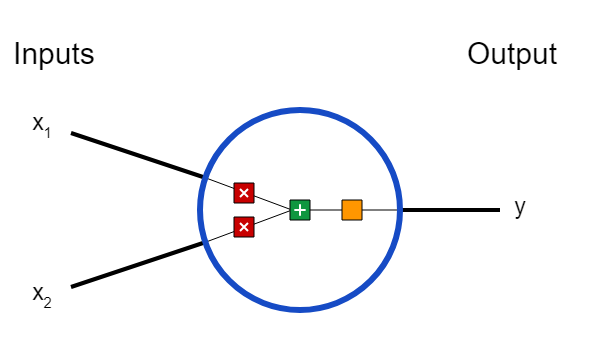

First, each input is multiplied by a weight $w_1$ and $w_2$:

$$x_1 \rightarrow x_1 \cdot w_1 \tag{2.2.1}$$
$$x_2 \rightarrow x_2 \cdot w_2 \tag{2.2.2}$$

Then, the sum of the two weighted inputs is added with a bias b:

$$sum = x_1 \cdot w_1 + x_2 \cdot w_2 +b \tag{2.2.3}$$

Finally, the sum is passed through an activation function:

$$output = f(sum) \tag{2.2.4}$$

The activation function is used to turn an unbounded input into an output that has a nice, predictable form.[@Neuron]

In Jax and Flax, there are several commonly used activation functions such as Sigmoid, ReLU, Softmax.

Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer) to the last layer (the output layer), possibly passing through multiple intermediate layers (hidden layers). A network is typically called a deep neural network if it has at least two hidden layers.[@Neural_network]


### **Module 1: init**

#### **Imports**

*Souce Code*

In [ ]:
from .amplitude_masks import *
from .convenience import *
from .lenses import *
from .phase_masks import *
from .propagation import *
from .samples import *
from .sensors import *
from .sources import *
from .utils import trainable

*Explanation*

The import syntax `from .module_name import *` used in the code, is to bring in all modules, functions, or classes from a package or module located within the same project. These modules are going to be presented in the following parts.

The dot `.` indicates a relative import, signifying that the `module_name` is part of the same package as the current module. Additionally, `..` refers to the parent package, while `...` refers to the grandparent package, and so on.

The asterisk `*` acts as a wildcard instructing Python to import all functions, classes, variables, etc. from `module_name`. To control what is imported when using `*`, a special variable `__all__` can be applied to define a list of functions, classes, variables, etc. that the module explicitly exports and makes available for import. Alternatively, specific functions or classes can be imported by replacing the `*` with the exact names of the desired items. 

### **Module 2: amplitude_masks**

#### **Imports**

*Source Code*

In [ ]:
from typing import Callable, Tuple, Union

from chex import Array, PRNGKey
from flax import linen as nn

from chromatix.elements.utils import register

from ..field import Field
from ..functional.amplitude_masks import amplitude_change
from ..ops import binarize

__all__ = ["AmplitudeMask"]

*Explanation*

In Python, `typing` is a standard module that allows you to use type hints to indicate the expected types of variables, function arguments, and return values. `typing` enables developers to specify the types for better code clarity, documentation, and static type checking.

`Callable` is used in type annotations to indicate that a particular variable or function parameter is a function or an object that can be called like a function. For example:

In [4]:
from typing import Callable

# Define a function that takes a callable as an argument.
def afunc(func: Callable[[int, int], int], a: int, b: int):
    return func(a, b)

def add(x: int, y: int):
    return x + y

print(afunc(add, 3, 4))

7


In this example, `func` is a callable that takes two integers (int, int) as input and returns an integer (int). And `apply_func` accepts func, an `a`, and `b`, and applies the callable to `a` and `b`.  

By the way, Python is a dynamically typed language, meaning that types are not strictly enforced at runtime. The int and Callable in type annotations are simply type hints, used to indicate that the variables are expected to be of a certain type (e.g., int or a callable function). However, these type hints are not mandatory, and Python will not raise an error if variables of other types, such as float, are passed in. 

A `tuple` in Python is a collection of ordered, immutable elements. This means that once a tuple is created, its elements cannot be changed or updated. Unlike `list`, which is typically used for homogenous collections (elements of the same type), `tuple` can hold elements of different types, making it useful for grouping different kinds of data together.

The `Union` is used to specify that a value can be one of multiple specific types at a given time. But it does not mean that the value can hold more than one type at the same time.

`Chex` is a library that provides a collection of utilities for JAX and NumPy. It is designed to assist in writing reliable and testable code when working with JAX transformations like `jit`, `grad`, and `vmap`.

The imported `Array` is a type alias provided by Chex that represents a JAX array (`jnp.ndarray`), which is similar to a NumPy array but optimized for JAX's transformations and hardware acceleration.

`PRNGKey` is a type alias for JAX's pseudo-random number generator key, represented as a JAX array with a specific shape (`jnp.ndarray` of `shape (2,)` and `dtype` `uint32`). It is used to manage random number generation in a reproducible way. The first step for using `PRNGKey` is creating a PRNG key using `jax.random.PRNGKey(seed)`, then the PRNG key can be passed into JAX random number functions like  `jax.random.uniform` and `jax.random.normal`. For example:

In [10]:
import jax.numpy as jnp
import jax.random

# Create two PRNG keys with different seeds
key1 = jax.random.PRNGKey(20)
key2 = jax.random.PRNGKey(60)

# Generate a random numbers with key1 using `jax.random.uniform`
random_number1 = jax.random.uniform(key1)

# Generate a random number with key2 using `jax.random.normal`
random_number2 = jax.random.normal(key2)

print('key1 =', key1)
print('key2 =', key2)
print('random_number1 =', random_number1)
print('random_number2 =', random_number2)

key1 = [ 0 20]
key2 = [ 0 60]
random_number1 = 0.22824931
random_number2 = 0.00786821


`jax.random.PRNGKey(seed)` generates a deterministic pseudo-random number generator (PRNG) key based on the given seed. The seed ensures that the random numbers generated with this key will be the same every time.

`jax.random.uniform(key)` generates a random floating-point number uniformly distributed between 0 and 1 using the given PRNG key.`jax.random.normal(key)` generates a random floating-point number from a standard normal distribution (mean 0, standard deviation 1) using the given PRNG key.

`chex.PRNGKey` is simply a type hint when defining functions that expect a PRNG key as input, instead of being used to generate a PRNG key. 

For example:

In [11]:
import chex

# Define a function that returns a random number with a PRNG key.
def random_func(key: chex.PRNGKey):
    return jax.random.uniform(key)

key = jax.random.PRNGKey(20)

random_number = random_func(key)
print('random_number =', random_number)

random_number = 0.22824931


As we can see, the code above use a slightly different way to generate a random number, but the PRNG key is the same, so the code outputs the same random number.

`flax` is a high-performance, JAX-based neural network library which provides a flexible interface to define and train neural networks using JAX’s underlying transformations, such as `jit`, `grad`, and `vmap`. `linen` is the core module of `flax`, providing utilities to define and compose neural network layers and models.

The function `register` will be introduced in the module `utils` of the package `elements` under the project. It is responsible for the registration of attribute in a `Flax` module as either parametrs (trainable) or state variables (non-trainable). 

The class `Field` will be introduced in the module `field` directly under the project. 

The function `amplitude_change` will be introduces in the module `amplitude_masks` of the package `functional` under the project. 

The function `binarize` will be introduced in the module `quantization` of the package `ops` under the project.

#### **Class 1: AmplitudeMask**

*Source Code*

In [ ]:
class AmplitudeMask(nn.Module):
    """
    Applies an ``amplitude`` mask to an incoming ``Field``.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    The ``amplitude`` can be learned (pixel by pixel) by using
    ``chromatix.utils.trainable``.

    Attributes:
        amplitude: The amplitude to be applied. Should have shape `(H W)`.
        is_binary: binarize the amplitude mask if True.
    """

    amplitude: Union[Array, Callable[[PRNGKey, Tuple[int, int]], Array]]
    is_binary: bool

    @nn.compact
    def __call__(self, field: Field) -> Field:
        """Applies ``amplitude`` mask to incoming ``Field``."""
        amplitude = register(self, "amplitude", field.spatial_shape)
        if self.is_binary:
            amplitude = binarize(amplitude)
        return amplitude_change(field, amplitude)

*Explanation*

1. class

Unlike `def`, which is a function used to only encapsulate a block of code that performs a specific task, `class` is a blueprint for creating objects. It's used to define objects and model real-world entities, and it allows for grouping data (attributes) and behaviors (methods) together, enabling object-oriented programming. 

Besides, `class` supports inheritance, which functions don't. Inheritance is core feature of object-oriented programming. Developers can creat a new class that inherit properties and mothods from parent classes by putting the parent class in the parentheses after the class name.

Calling a `class` will create an instance or object of that class. This is done by using the class name followed by parentheses, like calling a function. The parentheses can contain arguments if the class's `__init__` method requires them. 

For example:

In [9]:
class add_two_numbers:
    def __init__(self, number1, number2):
        #Initialize the attributes
        self.number1 = number1
        self.number2 = number2
    
    #Define a method to add two numbers
    def add(self):
        return self.number1 + self.number2

# Create an instance of the class    
sum_instance = add_two_numbers(3, 4)
print('sum =', sum_instance.add())

sum = 7


2. initialization

In this example, the code has no parentheses after the class name, since it's not a subclass of any parent class. And the code first defines a function named `__init__` which is called method here. The `__init__` method is commonly (but not necessary) used to accept and initialize attributes (number1, number2) of the class. It is a constructor that is used to set up the initial state of the object. But if no special initialization is needed, you can create classes without the `__init__` method. For example:

In [1]:
class add_two_numbers:
    def add(self, number1, number2):
        return number1 + number2
    
sum_instance = add_two_numbers()
print('sum =', sum_instance.add(5, 6))

sum = 11


Beside the `__init__` method, another difference is that the arguments can't be paased into `sum_instance = add_two_numbers()`. This is because the second `add_two_numbers` class has no `__init__` method, which is responsible for accepting and initializing arguments. And the attributes `number1` and `number2` are not part of the class's state until they are explicitly used in the `add` method. However, when using a class with the `__init__` method to create an instance (`sum_instance = add_two_numbers(3, 4)`), the arguments must be passed to match the `__init__` method's signature.

3. self

Another interesting point is that there is still a keyword `self` in the second `add_two_numbers` class even though it doesn't appear in the rest of the code. This is because that the keyword `self` is used to refer to the instance of the class that is being created or manipulated. And it allows you to access and modify the object's and attributes and methods like `self.number1` and `sum_instance.add()` in the previous example. Without `self`, it's not possible to store values in the attributes of the class and make the attrbutes available to the methods in the class.

4. nn.Module

Now, let's look at the source code. It creates a class `AmplitudeMask` as a subclass of `nn.Module`, meaning it inherits from `nn.Module`.

The `nn.Module` is a base class in the Flax library and a core building block for defining custom neural network components such as layer or entire models. Every time you create a new layer or model (subclasses) in Flax, you create a new `nn.Module`.

5. attributes

The source code then annotates the types of the attributes `amplitude` and `is_binary` as `Union[Array, Callable[[PRNGKey, Tuple[int, int]], Array]]` and `bool`. This means that the `amplitude` can be either an array or a callable that takes a PRNG key and a tuple of two integers as input and returns an array, and the `is_binary` is boolean indicating whether the amplitude should be binarized or not. 

6. @nn.compact

Next, the developer uses a keyword `@nn.compact`. It is the most commomly used *decorator* in Flax used to define layers and opertions directly within the *forward pass* method `__call__` of a Flax module.

The forward pass means the process of passing input data through the layers of the neural network to compute an output. This is the key operation in neural networks used in training.

A decorator in Python is a function that wraps around another function or method, adding extra behavior to it without modifying its structure. Decorators are used by prefixing a function or method definition with an `@` symbol followed by the name of the decorator like the source code shows.

With `@nn.compact`, developers are allowed to create instances of layers directly in the forward pass (`__call__` method), and Flax will automatically handle initialization and caching. Without `@nn.compact`, developers need to used a `setup` method to define the layers as attributes and then use those attributes in the `__call__` method.

For example：

In [2]:
from flax import linen as nn
# Without `@nn.compact`
class Net(nn.Module):
    def setup(self):
        self.dense = nn.dense(feature=10)

    def __call__(self, x):
        x = self.dense(x)
        return x

In [5]:
# With `@nn.compact`
class Net(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.dense(feature=10)(x)
        return x

The code above defines a forward pass which takes `x` as the input passed to the model. `x = nn.dense(feature=10)(x)` defines a fully connected (dense) layer in the neural network with 10 output units. It applies a linear transformation to the input: $y = wx + b$, where $w$ is the weight matrix and $b$ is the bias.

7. call method

The `__call__` method is written with the decorator `@nn.compact` meaning that the method is the core functionality of the module. It accepts a `Field` as input and is responsible for applying the amplitude mask to the `Field` to modify the amplitude of the `Field`. In Chromatix, the `Field` is defined in a module as a container that describes the chromatic light field with complex values at a 2D plane. 

The line `amplitude = register(self, "amplitude", field.spatial_shape)` calls the `register` function built in Chromatix, passing three arguments: `self`, `"amplitude"`, and `field.spatial_shape`. `self` refers to the current instance of the` AmplitudeMask` class, which is a subclass of `nn.Module`. `"amplitude"` is the name of the parameter that we want to register, namely amplitude mask. `field.spatial_shape` extracts the spatial shape the `Field` as the shape of the amplitude mask.

In short words, the `register` function registers the `"amplitude"` attributes as a Flax parameter, which is trainable and will be optimized during training or a Flax variable, which is not trainable and will be treated as a fixed state variable.

Then, the `if` sentence will judge whether the `is_binary` attrubute of the instance is `True`. If it is, the `amplitude` will be binarized by the function `binarize` meaning that the values are converted into values of 0 or 1.

Finally, the `amplitude_change` funtion, which is also defined in Chromatix, modifies the incoming `Field` based on the `amplitude` mask. This operation results in a new field with a modified amplitude, which can be then passed ti possible subsequent elements.

### **Module 3：convenience**

#### **Imports**

*Source Code*

In [ ]:
from typing import Optional, Tuple, Union

import flax.linen as nn
import jax.numpy as jnp
from chex import Array

from ..field import Field
from ..ops import binarize, quantize

__all__ = ["Flip", "ScaleAndBias", "Binarize", "Quantize"]

*Explanation*

The first line imports `Optional`, `Tuple`, and `Union` from the `typing`. Since `Tuple` and `Union` have been introduced before, let's look at the other one `Optional`. `Optional` is similar to `Union`, it is used when a value can either be of a certain type or `None`. Therefore, `Optional[X]` is shorthand for `Union[X, None]`, in which, `X` could be types such as `int`, `float`, etc.

The function `quantize` is defined in the module `quantization` under the package `ops` of Chromatix. It adjusts the input `x` to a specific `bit_depth`, using a surrogate gradient approach.

The last line indicates that the classes `Flip`, `ScaleAndBias`, and `Binarize` can be exported and made available for use.

#### **Class 1: Flip**

*Source Code*

In [ ]:
class Flip(nn.Module):
    """
    This element flips the incoming ``Field`` upside down.

    This is useful for situations where an upside down image is formed.
    """

    @nn.compact
    def __call__(self, field: Field) -> Field:
        # TODO: Add in support for both axes?
        return field.replace(u=jnp.flip(field.u, axis=field.spatial_dims[0]))

*Explanation*

As the source code writes, the `Flip` class defines a module that flips an incoming `Field` object upside down along one spatial axis. This class also inherites from `nn.Module` and uses the `@nn.compact` decorator to define the forward pass.

The `__call__` method takes a `Field` object as input and returns the flipped `Field`，by using the following functions:
1. `jnp.flip(array, axis)`: In this function, the first variable is the array which needs to be flipped, and the second variable is the axis along which the array needs to be flipped. For example:

In [ ]:
import jax.numpy as jnp

# Create a 3x3 array
array = jnp.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

# Flip the array upside down along axis 0 (vertical axis)
flipped_array0 = jnp.flip(array, axis=0)

# Flip the array left to right along axis 1 (horizontal axis)
flipped_array1 = jnp.flip(array, axis=1)

print('upside down flipped array =\n', flipped_array0)
print('left to right flipped array =\n', flipped_array1)

upside down flipped array =
 [[7 8 9]
 [4 5 6]
 [1 2 3]]
left to right flipped array =
 [[3 2 1]
 [6 5 4]
 [9 8 7]]


The source code of `field.spatial.dim` returns the height and width of the field:

In [3]:
def spatial_dims(self) -> Tuple[int, int]:
    """Dimensions representing the height and width of the complex field."""
    return (-4, -3)

Because the shape of the field is `(B... H W C [1 | 3])`, and when Python denotes sequence numbers from right end to left end, it starts from `-1`, the `-4` refers to the dimension of height (`H`) and `-3` refers to the dimension of width (`W`).

Therefore, `field.spatial_dims` refers to a tuple that represents the indices of the spatial dimensions within the shape of the `Field` object. And `field.spatial.dim[0]` refers to the index of the first spatial dimension, which also meas the vertical axis along which the data in `field.u` is flipped.

4. `field.replace()`: The method `replace()` is not actually defined in the class `Field`, but in its parent class `struct.PyTreeeNode`. Since the class `Field` inherits from its parent class `struct.PyTreeNode`, `Field` also get this method and doesn't need to create a new one. The `replace` method is avaliable to create a new instance of the class with updated attributes and leave all other attributes unchanged, preserving the immutability of the object.

#### **Class 2: ScaleAndBias**

*Source Code*

In [ ]:
class ScaleAndBias(nn.Module):
    """
    This element applies a ``scale`` and ``bias`` to the incoming ``Field``.

    The ``scale`` and ``bias`` can either be scalars or ``Array``s
    broadcastable to the shape of the incoming ``Field``.
    """

    bias: Union[float, Array]
    scale: Union[float, Array]

    @nn.compact
    def __call__(self, field: Field) -> Field:
        return (field + self.bias) * self.scale

*Explanation*

This class simply adds a`bias` to the incoming `field` and multiplies the sum by a `scale`. `bias` and `scale` could be either `float` or `Array`.

Suppose we have a `field` object:

In [ ]:
from chromatix import Field
import jax

# Create an instance of the Field class
field = Field(u=jnp.array([[1, 2 ,3], [4, 5, 6], [7, 8, 9]]), # Field data
              _dx=jnp.array([1.0, 1.0]), # Spacing of the samples
              _spectrum=jnp.array([550]), # Wavelengths
              _spectral_density=jnp.array([1.0]) # Spectral density of the field
              )

Then, let's create an instance of the `ScaleAndbias` class and apply it to get an output:

In [ ]:
# Create an instance of the class ScaleAndBias
scale_and_bias = ScaleAndBias(bias=0.5, scale=2.0)
key = jax.random.PRNGKey(0)
variables = scale_and_bias.init(key, field)

new_field = scale_and_bias.apply(variables, field)

print('Old field =', field.u)
print('New field =', new_field.u)

Old field = [[1 2 3]
 [4 5 6]
 [7 8 9]]
New field = [[ 3.  5.  7.]
 [ 9. 11. 13.]
 [15. 17. 19.]]


#### **Class 3: Binarize**

*Source Code*

In [ ]:
class Binarize(nn.Module):
    """
    This element binarizes the incoming ``Field``.

    See ``chromatix.ops.quantization.binarize`` for more details.
    """

    threshold: float = 0.5

    @nn.compact
    def __call__(self, field: Field) -> Field:
        return field.replace(u=binarize(field.u, self.threshold))

*Explanation*

This class aims to binarize the incoming `Field` by calling the function `binarize` from `chromatix.ops.quantization`. This function simply converts the input `Field` to a binary format based on a specified threshold. The threshold is set to 0.5 by default, any value bigger than the threshold will be set to 1, and any value smaller than the threshold will be set to 0.

#### **Class 4: Quantize**

*Source Code*

In [ ]:
class Quantize(nn.Module):
    """
    This element quantizes the incoming ``Field`` to the given ``bit_depth``.

    See ``chromatix.ops.quantization.quantize`` for more details.
    """

    bit_depth: int
    range: Optional[Tuple[int, int]] = None

    @nn.compact
    def __call__(self, field: Field) -> Field:
        return field.replace(u=quantize(field.u, self.bit_depth, self.range))

*Explanation*

This class applies the `quantize` function from `chromatix.ops.quantization` to the incoming `Field` to quantize the data to a specific bit depth. 

The class takes two attributes. The `bit_depth` attribute determines the number of bits used to represent the values in the `Field`. This controls how many levels the data is quantized into. For example, if `bit_depth` is 8, the values in the `Field` will be quantized to 8-bit, 256 levels as $2^8 = 256$

The `range` attribute is optional meaning that it could be a `Tuple` or `None`. If a `range` is provided (`Tuple`), the function uses the provided minimum and maximum values. If a `range` is not provided (`None`), the minimum value of the range will be set to the minimum value of the input `Field`, and the maximum value will be set to $x_{max} = max(x - x_{min})$

### **Module 4：lenses**

As the name of this module suggests, this module defines three different types of lenses: thin lens, FFlens, and DFlens by focal length, refractive index, and numerical aperture (NA) of the lens.

In optics, a thin lens is a lens with a thickness (distance along the optical axis between the two surfaces of the lens) that is negligible compared to the radii of curvature of the lens surfaces. Lenses whose thickness is not negligible are sometimes called thick lenses.[@Thin_Lens]

The thin lens approximation ignores optical effects due to the thickness of lenses and simplifies ray tracing calculations. It is often combined with the paraxial approximation in techniques such as ray transfer matrix analysis.[@Thin_Lens]

The focal length of an optical system is a measure of how strongly the system converges or diverges light; it is the inverse of the system's optical power. A positive focal length indicates that a system converges light, while a negative focal length indicates that the system diverges light. A system with a shorter focal length bends the rays more sharply, bringing them to a focus in a shorter distance or diverging them more quickly as shown in the figure below. [@Focal_Length]

![Focal Length.jpg](<attachment:Focal Length.jpg>)

For the special case of a thin lens in air, a positive focal length is the distance over which initially collimated (parallel) rays are brought to a focus, or alternatively a negative focal length indicates how far in front of the lens a point source must be located to form a collimated beam. For more general optical systems, the focal length has no intuitive meaning; it is simply the inverse of the system's optical power.[@Focal_Length]



In optics, the refractive index (or refraction index) of an optical medium is a dimensionless number that gives the indication of the light bending ability of that medium.[@Refractive_Index] The refractive index, n, of a material is defined as $n=c/v$ where c is the speed of light in a vacuum and v is the speed of light in the medium.

In optics, the numerical aperture (NA) of an optical system is a dimensionless number that characterizes the range of angles over which the system can accept or emit light. By incorporating index of refraction in its definition, NA has the property that it is constant for a beam as it goes from one material to another. In most areas of optics, and especially in microscopy, the numerical aperture of an optical system such as an objective lens is defined by:[@Numerical_Aperture]

$$NA = n \cdot \sin\theta \tag{2.2.5}$$
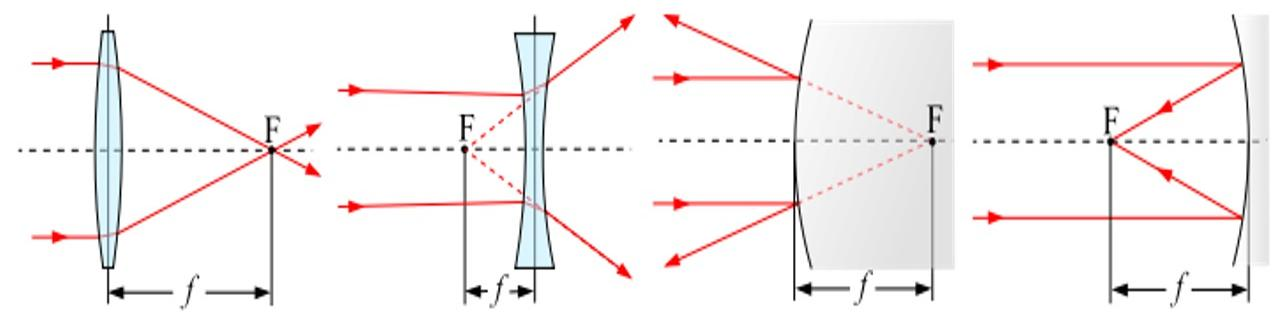

#### **Imports**

*Source Code*

In [ ]:
from typing import Callable, Optional, Union

import flax.linen as nn
from chex import PRNGKey

from chromatix.elements.utils import register

from .. import functional as cf
from ..field import Field

__all__ = ["ThinLens", "FFLens", "DFLens"]

*Explanation*

Here imports a new package `functional` from `chromatix`. Inside this package is a collection of functions that are designed to help build classes in the modules of the package `elements`.

#### **Class 1: Thinlens**

*Source Code*

In [ ]:
class ThinLens(nn.Module):
    """
    Applies a thin lens placed directly after the incoming ``Field``.
    This element returns the ``Field`` directly after the lens.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    The attributes ``f``, ``n``, and ``NA`` can be learned by using
    ``chromatix.utils.trainable``.

    Attributes:
        f: Focal length of the lens.
        n: Refractive index of the lens.
        NA: If provided, the NA of the lens. By default, no pupil is applied
            to the incoming ``Field``.
    """

    f: Union[float, Callable[[PRNGKey], float]]
    n: Union[float, Callable[[PRNGKey], float]]
    NA: Optional[Union[float, Callable[[PRNGKey], float]]] = None

    @nn.compact
    def __call__(self, field: Field) -> Field:
        f = register(self, "f")
        n = register(self, "n")
        NA = register(self, "NA")
        return cf.thin_lens(field, f, n, NA)

*Explanation*

This code defines a `THinlens` class, which is also a neural network class like the classes in the previous modules. It models the behavior of a thin lens in an optical system by taking the three attributes: `f` for focal length, `n` for refractive index, and `NA` for numerical aperture (optionally) to apply the effect of a thin lens to an incoming `Field` and returns the modified `Field`.

The attributes `f` and `n` can either be a fixed value (`float`) or a callable that generates a value for dynamic training scenarios. For `NA`, if it's not provided, no pupil is applied to the incoming `Field` and `NA` is `None`, if it is provided, it can also be a fixed value (`float`) or a callable that generates a value for dynamic training scenarios.

The thin lens effect is applied to the input `Field` by the `__call__` method. The `register` function is responsible for the registration of attribute in a `Flax` module as either parameters (trainable) or state variables (non-trainable). 

Trainable refers to attributes of the module that can be updated or learned during training. Parameters are the values that the model learns during training, like weights or biases in neural networks. And state variables are non-trainable values that can change during inference but aren't updated by the optimizer.

Finally, the `cf.thin_lens` function applies the thin lens effect to the input `Field` and outputs the modified field.

#### **Class 2: FFlens**

*Source Code*

In [ ]:
class FFLens(nn.Module):
    """
    Applies a thin lens placed a distance ``f`` after the incoming ``Field``.
    This element returns the ``Field`` a distance ``f`` after the lens.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    The attributes ``f``, ``n``, and ``NA`` can be learned by using
    ``chromatix.utils.trainable``.

    Attributes:
        f: Focal length of the lens.
        n: Refractive index of the lens.
        NA: If provided, the NA of the lens. By default, no pupil is applied
            to the incoming ``Field``.
        inverse: Whether to use IFFT (default is False, which uses FFT).
    """

    f: Union[float, Callable[[PRNGKey], float]]
    n: Union[float, Callable[[PRNGKey], float]]
    NA: Optional[Union[float, Callable[[PRNGKey], float]]] = None
    inverse: bool = False

    @nn.compact
    def __call__(self, field: Field) -> Field:
        f = register(self, "f")
        n = register(self, "n")
        NA = register(self, "NA")
        return cf.ff_lens(field, f, n, NA, inverse=self.inverse)

*Explanation*

This class is used to simulate the case that a field propagates through a thin lens and then a distance `f` after the lens. This means that if the incoming field is a plane wave, the field will converge to a point at the distance `f` from the thin lens.

Besides the attribute `f`, `n`, and `NA`, this class also includes the attribute `inverse` to determine whether to use the Inverse Fast Fourier Transform (IFFT) or the Fast Fourier Transform (FFT). If `inverse = False`, FFT will be applied, which means the field propagates normally. If `inverse = True`, IFFT will be applied, which means the field propagates backwards (`f` is negative).

Finally, in the `__call__` method, the code call the function `cf.ff_lens`. First the function applies a numerical aperture to the field if provided, and then it propagates the field over a distance `f` of `-f` (if inverse) using FFT or IFFT and outputs the modified field.

#### **Class 3: DFlens**

*Source Code*

In [ ]:
class DFLens(nn.Module):
    """
    Applies a thin lens placed a distance ``d`` after the incoming ``Field``.
    This element returns the ``Field`` a distance ``f`` after the lens.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    The attributes ``d``, ``f``, ``n``, and ``NA`` can be learned by using
    ``chromatix.utils.trainable``.

    Attributes:
        d: Distance from the incoming ``Field`` to the lens.
        f: Focal length of the lens.
        n: Refractive index of the lens.
        NA: If provided, the NA of the lens. By default, no pupil is applied
            to the incoming ``Field``.
        inverse: Whether to use IFFT (default is False, which uses FFT).
    """

    d: Union[float, Callable[[PRNGKey], float]]
    f: Union[float, Callable[[PRNGKey], float]]
    n: Union[float, Callable[[PRNGKey], float]]
    NA: Optional[Union[float, Callable[[PRNGKey], float]]] = None
    inverse: bool = False

    @nn.compact
    def __call__(self, field: Field) -> Field:
        d = register(self, "d")
        f = register(self, "f")
        n = register(self, "n")
        NA = register(self, "NA")
        return cf.df_lens(field, d, f, n, NA, inverse=self.inverse)

*Explanation*

This class is totally the same with the `FFlens` class, but it models the case that a field propagates through a thin lens and then a distance `d` after the lens.

### **Module 5: phase_masks**

#### **Imports**

*Source Code*

In [ ]:
from typing import Callable, Optional, Tuple, Union
import jax.numpy as jnp
from chex import Array, PRNGKey
from flax import linen as nn
from jax.scipy.ndimage import map_coordinates
from chromatix.field import Field
from chromatix.functional import wrap_phase, phase_change
from chromatix.utils import seidel_aberrations, zernike_aberrations
from chromatix.ops import quantize
from chromatix.elements.utils import register

__all__ = [
    "PhaseMask",
    "SpatialLightModulator",
    "SeidelAberrations",
    "ZernikeAberrations",
]

*Explanation*

1. `from jax.scipy.ndimage import map_coordinates`: 
    
This line imports a JAX-compatible `map_coordinates` function of the module `ndimage` from `jax.scipy`. It takes an `input` array and a set of `coordinates` (floating point indices indicating locations) and interpolates the values at those coordinates using a given interpolation `order`. For example:

In [12]:
import jax.numpy as jnp
from jax.scipy.ndimage import map_coordinates

data = jnp.array([[1.0, 2.0, 3.0], 
                   [4.0, 5.0, 6.0], 
                   [7.0, 8.0, 9.0]])

coordinates = jnp.array([[0.5, 1.5],
                         [1.5, 2.5]])

interpolate_values = map_coordinates(data, coordinates, order=1)

print('interpolate_values =', interpolate_values)

interpolate_values = [4.   3.75]


Here is how the interpolation works: Each pair of values in the `coordinates` array corresponds to a point in the `data` array at which `map_coordinates` will interpolate. The shape of `coordinates` is `(2, 2)` which means that there are two points needing interpolation, the first point corresponds to the value at `(0.5, 1.5)` in the `data` array, and the second point corresponds to the value at `(1.5, 2.5)` in the `data` array. 

For the first coordinate `(0.5, 1.5)`, it means that the point in the `data` array is between the first and second rows, the second and third columns. It's thus surrounded by `data[0, 1] = 2`, `data[0, 2] = 3`, `data[1, 1] = 5`, and `data[1, 2] = 6`. 

As for interpolation, `map_coordinates` first does row interpolation. For row 0.5, the interpolation is done between row 0 and row 1 for both columns 1 and 2. For column 1, the interpolation happens between `data[0, 1] = 2` and `data[1, 1] = 5` with weights 0.5, since the points are at the middle of the rows and columns:

$$ interpolatedcol1 = 2 \times 0.5 + 5 \times 0.5 = 3.5 \tag{2.2.6}$$

For column 2, the interpolation happens between `data[0, 2] = 3` and `data[1, 2] = 6` with weights 0.5 and 0.5:

$$ interpolatedcol1 = 3 \times 0.5 + 6 \times 0.5 = 4.5 \tag{2.2.7}$$

Then, the function does column interpolation between the row-interpolated values along the column axis:

$$ finalvalue = 3.5 \times 0.5 + 4.5 \times 0.5 = 4 \tag{2.2.8}$$

The second point is at `(1.5, 2.5)`, which means it's surrounded by `data[1, 2]`, `data[1, 3]`, `data[2, 2]`. However, `data[2, 3]` and `data[1, 3]` are out of the `data` array. For making interpolations possible, the function handles the out-of-bounds points using `constant` mode by default, which means it sets `data[1, 3] = 0` and `data[2, 3] = 0` by default. Then the final inerpolated value is calculated in the same way as described above.

2. `from chromatix.functional import wrap_phase, phase_change`:

This line imports the `wrap_phase` and `phase_change` functions from the `phase_masks` module of the `chromatix_functional` package. `phase_change` perturbs a field by a phase and returns a modified field. `wrap_phase` wraps values of a phase to a given limit.

3. `from chromatix.utils import seidel_aberrations, zernike_aberrations`:

This line imports the functions `seidel_aberrations` and `zernike_aberrations` from the module `initializers` of the `chromatix.utils` package. `seidel_aberrations` is responsible for generating Seidel aberration phase masks, and `zernike_aberrations` is responsible for generating Zernike aberration phase masks.

4. Seidel Aberration:

In optics, aberration is a property of optical systems, such as lenses, that causes light to be spread out over some region of space rather than focused to a point. Aberrations cause the image formed by a lens to be blurred or distorted, with the nature of the distortion depending on the type of aberration. Aberration can be defined as a departure of the performance of an optical system from the predictions of paraxial optics.[@Optical_Aberration]

The most commom types of aberrations are monochromatic aberrations, including tilt, defocus, spherical aberration, coma, astigmatism, field curvature, distortion, and chromatic aberrations, including axial chromatix aberration, lateral chromatix aberration.

Seidel aberrations are known as primary or third-order aberrations, including spherical aberration, coma, astigmatism, field curvature, and distortion. These five Seidel can be mathematically expressed using polynomial expansions of the wavefront aberration function in polar coordinates:

$$W(\rho, \theta) = W_s(\rho) + W_c(\rho, \theta) + W_a(\rho, \theta) + W_f(\rho) + W_d(\rho) \tag{2.2.9}$$

Where $W$ is the total wavefront, $W_s$ represents spherical aberration, $W_c$ represents coma, $W_a$ represents astigmatism, $W_f$ represents field curvature, and $W_d$ represents distortion.

5. Zernike Aberration:

Zernike aberrations are a set of orthogonal polynomials used to describe wavefront aberrations in optical systems using polar coordinates. Each Zernike polynomial is defined by the radial order $n$ and the azimuthal frequency $m$:

$$Z^m_n(\rho, \theta) = R^m_n(\rho) \cdot \cos(m\theta) \tag{2.2.10}$$

$$Z^{-m}_n(\rho, \theta) = R^m_n(\rho) \cdot \sin(m\theta) \tag{2.2.11}$$

$$R^m_n(\rho) = \sum^{(n-m)/2}_{k=0}\frac{(-1)^k \cdot (n-k)!}{k! \cdot (\frac{n+m}{2}-k)! \cdot (\frac{n-m}{2}-k)!} \cdot \rho^{n-2k} \tag{2.2.12}$$

Then, the Zernike polynomials can be used to express different types of aberrations:

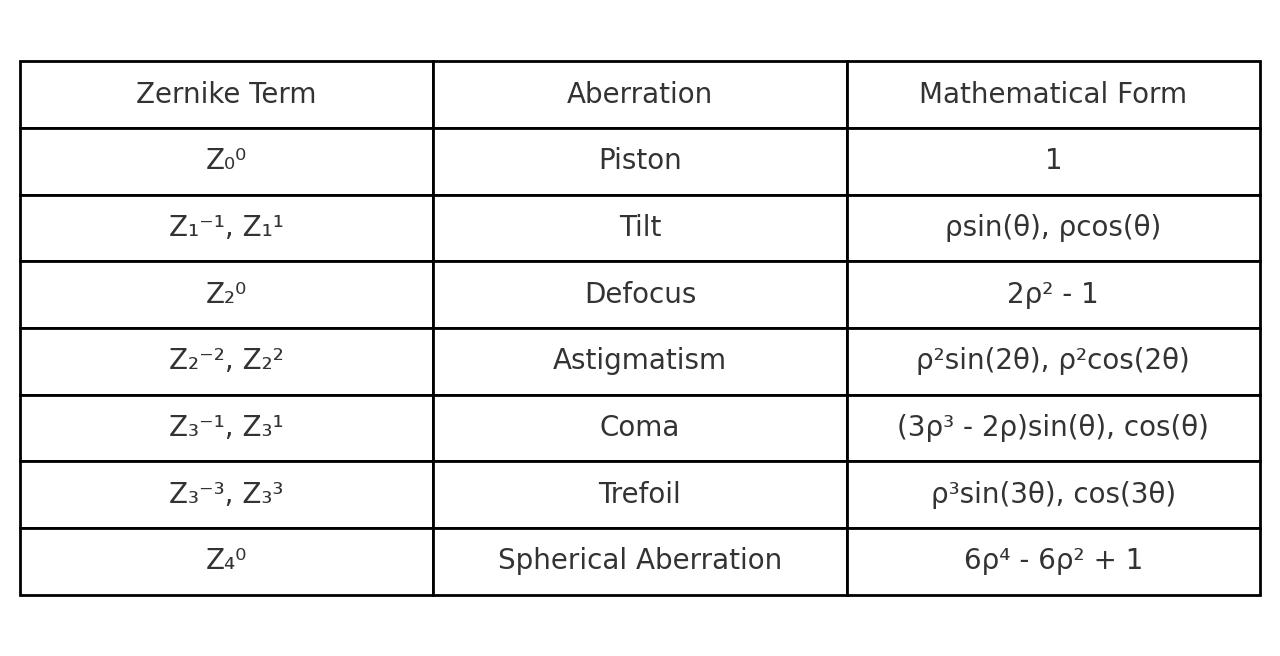

And the total wavefront aberration is expressed as a sum of Zernike aberrations:

$$W(\rho, \theta) = \sum_{n,m}c^m_nZ^m_n(\rho, \theta) \tag{2.2.13}

#### **Class 1: PhaseMask**

*Source Code*

In [ ]:
class PhaseMask(nn.Module):
    """
    Applies a ``phase`` mask to an incoming ``Field``.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    This element handles multi-wavelength ``Field``s by assuming that the first
    wavelength in the ``spectrum`` of the ``Field`` is the central wavelength
    for which the ``phase`` was calculated, and modulates the ``phase`` by the
    ratio of other wavelengths in the ``spectrum`` to the central wavelength
    appropriately.

    The ``phase`` can be learned (pixel by pixel) by using
    ``chromatix.utils.trainable``.

    Since phase mask initializations might require information about the
    pupil of a system, the extra parameters ``n``, ``f``, and ``NA`` can
    be specified. These will be passed as arguments to the phase mask
    initialization function if ``phase`` is trainable. Note that if any of
    these is None, none of them will be passed to the initialization function
    and you will get an error.

    Attributes:
        phase: The phase to be applied. Should have shape `(H W)`.
        f: Focal length of the system's objective. Defaults to None.
        n: Refractive index of the system's objective. Defaults to None.
        NA: The numerical aperture of the system's objective. Defaults to None.
    """

    phase: Union[Array, Callable[[PRNGKey, Tuple[int, int], float, float], Array]]
    f: Optional[float] = None
    n: Optional[float] = None
    NA: Optional[float] = None

    @nn.compact
    def __call__(self, field: Field) -> Field:
        """Applies ``phase`` mask to incoming ``Field``."""
        if all(x is not None for x in [self.n, self.f, self.NA]):
            pupil_args = (self.n, self.f, self.NA)
        else:
            pupil_args = ()

        phase = register(
            self,
            "phase",
            field.spatial_shape,
            field.dx[..., 0, 0].squeeze(),
            field.spectrum[..., 0, 0].squeeze(),
            *pupil_args,
        )

        return phase_change(field, phase)

*Explanation*

The code above defines a class `PhaseMask` that inherits from `nn.Module`, indicating it's a neural network class. It's responsible for applying a phase mask to an incoming field and return a modified field. It takes four attributes, `phase`, `f`, `n`, and `NA`. 

1. Attributes:

`f`, `n`, and `NA` are optional and have default values of `None`, meaning that they are often not considered unless a pupil exists and needs to be specified. `phase` could either be a normal 2D array to represent the phase mask directly, or a callable that returns a 2D array. If `phase` is a callable, it can be learned by using `chromatix.utils.trainable` to generate the phase mask for possible optimization.

2. Method:

Then, as usual, the code defines the `__call__` method, which makes the class callable like a function. The method takes a `Field` object which represents the incoming field and returns a phase-modified `Field`. In the method, an if-clause is applied to check if all the optional attributes `n`, `f`, and `NA` are provided. If provided, it creates a tuple `pupil_args` that contains these values. Otherwise, it assigns an empty tuple to `pupil_arg`， ensuring that the function only passes these arguments if all are defined.

Then the code calls a `register` function to initialize or retrieve the `phase` mask depending on whether it's trainable or fixed. The result from this function is the phase mask and stored in the `phase` variable, which will be applied to the `Field`. 

In the `register` function, `self` is the current instance of `PhaseMask`, `"phase"` is the name of the parameter to register, and `field.spatial_shape` calls the method `spatial_shape` in the class `Field` to provide the shape of the field.

`field.dx` and `field.spectrum` are the two attributes in the class `Field`. `field.dx` is the spacing of the sample in `field.u` (the complex field) in order to discretizing a continues field, and has a shape of `(2 B... H W C [1 | 3])`. `field.spectrum` is the wavelength sampled by the field with a shape of `(B... H W C [1 | 3])` 

`[..., 0, 0]` means that the preceding dimensions will be taken as they are, and from the last two dimensions, only the elements at position `[0, 0]` will be taken. For example, the first four dimensions (`(2 B... H W)`) of `field.dx` will be taken wholly, and from the fifth and sixth dimensions (`(C [1 | 3])`), only the first elements (`[0, 0]`) of the two dimensions will be taken.

`.squeeze()` is applied to remove any singleton dimensions that might result after indexing `field.dx[..., 0, 0]` and `field.spectrum[..., 0, 0]`, ensuring that the unnecessary extra dimensions are removed. 

For example:

In [5]:
import numpy as np

#Create a 3D array
input_array = np.array([[[1, 2, 3], [4, 5, 6]]])

print('shape of the input array:', input_array.shape)
print('input array = \n', input_array)

#Squeeze the 3D array
output_array = np.squeeze(input_array)

print('shape of the output array:', output_array.shape)
print('output array =\n', output_array)

shape of the input array: (1, 2, 3)
input array = 
 [[[1 2 3]
  [4 5 6]]]
shape of the output array: (2, 3)
output array =
 [[1 2 3]
 [4 5 6]]


As shown above, the singleton dimension of the `input_array` is removed by `np.squeeze()`, converting the 3D array into a 2D array.

`*pupil_args` returns an unpacked `pupil_args` tuple, since `register` needs individual arguments, but `pupil_args` can only be passed as a single argument.

In [4]:
pupil_args = (1.2, 3.5 , 12)

print('unpacked pupil_args =\n', *pupil_args)

unpacked pupil_args =
 1.2 3.5 12


Finally, the phase mask is applied to the field using `phase_change` which modifies the phase of the field based on the phase mask.

#### **Class 2: SpatialLightModulator**

*Source Code*

In [ ]:
class SpatialLightModulator(nn.Module):
    """
    Simulates a spatial light modulator (SLM) applied to an incoming ``Field``.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    This means that this element acts as if the SLM is phase only and transmits
    a ``Field``, rather than reflecting it.

    This element handles multi-wavelength ``Field``s by assuming that the first
    wavelength in the ``spectrum`` of the ``Field`` is the central wavelength
    for which the ``phase`` was calculated, and modulates the ``phase`` by the
    ratio of other wavelengths in the ``spectrum`` to the central wavelength
    appropriately.

    This element also handles the limited phase modulation range of an SLM,
    controlled by ``phase_range``.

    This element also roughly handles the simulation of the surface of
    the SLM by interpolating the phase with the given ``shape`` (which
    can be the number of pixels in the SLM) to the shape of the incoming
    ``Field``, which is assumed to have a shape larger than the given SLM
    ``shape``. The order of the interpolation performed can be controlled with
    ``interpolation_order``, but currently only orders of 0 (nearest neighbor)
    and 1 (linear interpolation) are supported.

    The ``phase`` of the SLM can be learned (pixel by pixel) by using
    ``chromatix.utils.trainable``.

    Attributes:
        phase: The phase to be applied. Should have shape `(H W)`.
        shape: The shape of the SLM, provided as (H W).
        spacing: The pitch of the SLM pixels.
        phase_range: The phase range that the SLM can simulate, provided as
            (min, max).
        num_bits: The number of bits of precision the phase pixels should be
            quantized to. Defaults to None, in which case no quantization is
            applied. Otherwise, the phase will be quantized to have
            ``2.0 ** num_bits`` values within ``phase_range``.
        interpolation_order: The order of interpolation for the SLM pixels to
            the shape of the incoming ``Field``. Can be 0 or 1. Defaults to 0.
        f: Focal length of the system's objective. Defaults to None.
        n: Refractive index of the system's objective. Defaults to None.
        NA: The numerical aperture of the system's objective. Defaults to None.
    """

    phase: Union[Array, Callable[[PRNGKey, Tuple[int, int], float, float], Array]]
    shape: Tuple[int, int]
    spacing: float
    phase_range: Tuple[float, float]
    num_bits: Optional[Union[int, float]] = None
    interpolation_order: int = 0
    f: Optional[float] = None
    n: Optional[float] = None
    NA: Optional[float] = None

    @nn.compact
    def __call__(self, field: Field) -> Field:
        """Applies simulated SLM ``phase`` mask to incoming ``Field``."""
        if all(x is not None for x in [self.n, self.f, self.NA]):
            pupil_args = (self.n, self.f, self.NA)
        else:
            pupil_args = ()

        phase = register(
            self,
            "phase",
            self.shape,
            self.spacing,
            field.spectrum[..., 0, 0].squeeze(),
            *pupil_args,
        )
        assert (
            phase.shape == self.shape
        ), "Provided phase shape should match provided SLM shape"
        phase = wrap_phase(phase, self.phase_range)
        if self.num_bits is not None:
            phase = quantize(phase, 2.0**self.num_bits, range=self.phase_range)
        field_pixel_grid = jnp.meshgrid(
            jnp.linspace(0, self.shape[0] - 1, num=field.spatial_shape[0]) + 0.5,
            jnp.linspace(0, self.shape[1] - 1, num=field.spatial_shape[1]) + 0.5,
            indexing="ij",
        )
        phase = map_coordinates(phase, field_pixel_grid, self.interpolation_order)

        return phase_change(field, phase)

*Explanation*

This class simulates spatial light modulator. A spatial light modulator is a device used to control the intensity, phase, or polarization of light. In this case, the code only simulates the modulation of phase.

Compared to the class `PhaseMask`, besides the same attributes `phase`, `f`, `n`, and `NA` which act as the same role, this class takes five more attributes, namely, `shape`, `spacing`, `phase_range`, `num_bits`, and `interpolation_order`. 

`shape` and `spacing` define the size and structure of a spatial light modulator. `shape` is defined as a tuple `(H, W)` representing the size of the spatial light modulator, where H and W are the number of pixels in the height and width directions, respectively. `spacing` defines the pitch, meaning the distance between two pixels.

`phase_range` and `num_bits` defines how will the spatial light modulator modulate the phase of the incoming field. `phase_range` is also defined as a tuple, and it defines the range within which the spatial light modulator can modulate the phase. Because the period of a wave is $2\pi$, the range is usually set between 0 and $2\pi$, or $-\pi$ and $\pi$. `num_bits` is used to quantize the `phase_range`, controlling the precision of phase, namely, the number of discrete phase levels that the spatial light modulator can apply to the incoming field.

`interpolation_order` indicates what kind of interpolation the `map_coordinates` should apply. `order = 0` means that `map_coordiantes` applies nearest_neighbor interpolation, which rounds each coordinate to its nearest integer value.

For example:

In [14]:
data = jnp.array([[1.0, 2.0, 3.0], 
                   [4.0, 5.0, 6.0], 
                   [7.0, 8.0, 9.0]])

coordinates = jnp.array([[0.5, 1.5],
                         [1.5, 2.5]])

interpolated_values = map_coordinates(data, coordinates, order=0)

print('interpolate_values =', interpolated_values)

interpolate_values = [6. 0.]


In this example, the `coordinates` is rounded to `[1, 2]` and `[2, 3]` as `order=0`. Accordingly, the `interpolate_value` becomes `data[1, 2] = 6` and `data[2, 3] = 0` (The boundary mode is `constant` by default which means out-of-array values are set to 0).

`__call__` method defines what happens when the spatial light modulator is applied to an incoming field. The if-clause and `register` function do the same thing as in the `PhaseMask`. Apart from them, the method then uses clauses to achieve its goal.

First, it applies a `assert` statement. The `assert` statement in Python is used as a debugging aid. It tests whether a given condition is `True`, if it is `False`, an `AssertionError` will be raised like this:

In [17]:
x = 5
assert(x==5)
assert(x==1)

AssertionError: 

Second, it wraps `phase` within the `phase_range` which is typically $(0, 2\pi)$ or $(-\pi, \pi)$ and then quantizes it `num_bits` is provided.

Third, it creates `field_pixel_grid` with functions `jnp.meshgrid()` and `jnp.linspace()` in order to generate a grid of pixel coordinates, which is crucial when interpolating values to a field.

`jnp.meshgrid()` constructs N-dimensional grid arrays from N 1-dimensional vectors and returns a length-N list of grid arrays.

For example:

In [2]:
import jax.numpy as jnp

x = jnp.array([0, 1, 2, 3, 4, 5])
y = jnp.array([0, 1, 2, 3, 4, 5, 6])

X, Y = jnp.meshgrid(x, y, indexing = 'ij')

print('X grid =', X)
print('Y grid =', Y)

X grid = [[0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1]
 [2 2 2 2 2 2 2]
 [3 3 3 3 3 3 3]
 [4 4 4 4 4 4 4]
 [5 5 5 5 5 5 5]]
Y grid = [[0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]
 [0 1 2 3 4 5 6]]


`indexing = 'ij'` means the output uses matrix indexing. `indexing = 'xy'` means the output uses cartesian indexing (default).

`jnp.linspace()` generates evenly spaced numbers between parameters `start` and `stop`. `num` is the number of points in the output array.

For example:

In [15]:
# Create a 1D array starting from 0, stopping at 5 with 11 elements
a = jnp.linspace(0, 5, 11)
print('a = ', a)

a =  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


As the output shows, the difference between two neighboring elements is:

$$ dif = \frac{stop - start}{num - 1} \tag{2.2.14}$$

In the source code, `jnp.linspace(0, self.shape[0]-1, sum=field.spatial_shape[0])` creates a 1D array according to the height of the spatial light modulator (`self.shape[0]`), and the height of the incoming field (`field.spatial_shape[0]`). `+ 0.5` term shifts the generated values by half a unit for centering the coordinates within each pixel. This makes the coordinate to the center of each pixel rather than the edge, which is important when interpolating.

Finally, the code applies `phase_change()` to apply the calculated phase modulation to the incoming field.

#### **Class 3: SeidelAberrations**

*Source Code*

In [ ]:
class SeidelAberrations(nn.Module):
    """
    Applies Seidel phase polynomial to an incoming ``Field``.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    This element handles multi-wavelength ``Field``s by assuming that the first
    wavelength in the ``spectrum`` of the ``Field`` is the central wavelength
    for which the ``phase`` was calculated, and modulates the ``phase`` by the
    ratio of other wavelengths in the ``spectrum`` to the central wavelength
    appropriately.

    The ``coefficients`` can be learned by using ``chromatix.utils.trainable``.

    Attributes:
        coefficients: The Seidel coefficients. Should have shape `[5,]`.
        f: The focal length.
        n: The refractive index.
        NA: The numerical aperture. The applied phase will be 0 outside NA.
        u: The horizontal position of the object field point
        v: The vertical position of the object field point
    """

    coefficients: Union[Array, Callable[[PRNGKey], Array]]
    f: float
    n: float
    NA: float
    u: float
    v: float

    @nn.compact
    def __call__(self, field: Field) -> Field:
        """Applies ``phase`` mask to incoming ``Field``."""
        coefficients = register(self, "coefficients")
        phase = seidel_aberrations(
            field.spatial_shape,
            field.dx[..., 0, 0].squeeze(),
            field.spectrum[..., 0, 0].squeeze(),
            self.n,
            self.f,
            self.NA,
            coefficients,
            self.u,
            self.v,
        )

        return phase_change(field, phase)

*Explanation*

This class simulates Seidel aberration and applies a Seidel phase polynomial to a `Field` object. Seidel aberrations are low order optical aberrations that describe how light rays deviate due to imperfection in optical systems. They can be expressed as polynomials.

The class takes the following attributes. `coefficients` is a set of coefficients that represent the Seidel aberration terms. Each coefficient corresponds to a specific type of aberration. It could be either an `Array` or `Callable`. When it's a `Callable`, it can be trained in neural network. `f`, `n`, and `NA` represent focal length, refractive index, and numerical aperture respectively. `u` and `v` describe the horizontal and vertical positions of an object field, since aberrations are spatially various causing phase changes vary depending on the positions of object points. They are crucial to calculate Seidel polynomials.

In the `__call__` method, the code first registers the `coefficient` as a Flax parameter or variable depending on whether it's trainable. Then, it calls the function `seidel_aberrations` to compute the phase mask on the field's spatial shape, spacing, wavelength, and the object's refractive index, focal length, numerical aperture, Seidel coefficients. Finally, the code applies the phase mask to the incoming field.

#### **Class 4: ZernikeAberrations**

*Source Code*

In [ ]:
class ZernikeAberrations(nn.Module):
    """
    Applies Zernike aberrations to an incoming ``Field``.

    This element can be placed after any element that returns a ``Field`` or
    before any element that accepts a ``Field``.

    This element handles multi-wavelength ``Field``s by assuming that the first
    wavelength in the ``spectrum`` of the ``Field`` is the central wavelength
    for which the ``phase`` was calculated, and modulates the ``phase`` by the
    ratio of other wavelengths in the ``spectrum`` to the central wavelength
    appropriately.

    Attributes:
        coefficients: The Zernike coefficients as a 1D array.
        f: The focal length.
        n: The refractive index.
        NA: The numerical aperture. The applied phase will be 0 outside NA.
        ansi_indices: Indices of Zernike polynomials (ANSI indexing). Should
            have same length as coefficients.
    """

    coefficients: Union[Array, Callable[[PRNGKey], Array]]
    f: float
    n: float
    NA: float
    ansi_indices: Array

    @nn.compact
    def __call__(self, field: Field) -> Field:
        """Applies ``phase`` mask to incoming ``Field``."""
        coefficients = register(self, "coefficients")

        phase = zernike_aberrations(
            field.spatial_shape,
            field.dx[..., 0, 0].squeeze(),
            field.spectrum[..., 0, 0].squeeze(),
            self.n,
            self.f,
            self.NA,
            self.ansi_indices,
            coefficients,
        )

        return phase_change(field, phase)

*Explanation*

This class applies Zernike aberrations to an incoming field. Zernike aberrations are a series of polynomials used to express optical aberrations mathematically.

Compared to the `SeidelAberrations` class, this class is extremely similar, apart from that this one takes an `ansi_indices` attributes. ANSI is short for American National Standards Institute. The OSA/ANSI indices for Zernike circle polynomials were initially developed by an OSA Standards Taskforce in 1999 to reach consensus recommendations on definitions, conventions, and standards for reporting of optical aberrations of human eyes. It was later standardized in ANSI Z80.28 and ISO 24157 and adopted in some commercial software, such as COMSOL Ray Optics Module.[@Zernike_polynomials_and_their_applications]

The Zernike circle polynomials in the OSA/ANSI indices are defined as:[@Zernike_polynomials_and_their_applications]

$$Z_j(\rho, \theta)=Z_n^m(\rho, \theta)=\begin{cases}
                                         N^m_nR_n^{\lvert m \rvert}(\rho)\cos(m\theta), & m \geq 0 \\
                                         N^m_nR_n^{\lvert m \rvert}(\rho)\sin(\lvert m \rvert\theta), & m < 0
                                        \end{cases} \tag{2.2.15}$$

Where $n$ is a non-negative integer, $m$ is an integer, $n-\lvert m \rvert \geq 0$ and is even, $j$ is a mode-ordering number starting from 0. The radial polynomial $R_n^m(\rho)$ is defined as:[@Zernike_polynomials_and_their_applications]

$$R^{\lvert m \rvert}_n(\rho) = \sum^{(n-m)/2}_{s=0}\frac{(-1)^s \cdot (n-s)!}{s! \cdot (\frac{n+m}{2}-s)! \cdot (\frac{n-m}{2}-s)!} \cdot \rho^{n-2s} \tag{2.2.16}$$

The normalization factor $N^m_n$ can be written as:[@Zernike_polynomials_and_their_applications]

$$N^m_n=\sqrt{\frac{2(n+1)}{1+\delta_{m0}} \tag{2.2.17}}$$

The Zernike circle polynomials under OSA/ANSI indices can be sorted by either the single index $j$, or the double indices $n$ and $m$. To achieve conversion among these indices, one can use the following relations:[@Zernike_polynomials_and_their_applications]

$$ j=\frac{n(n+2)+m}{2} \tag{2.2.18} $$
$$ n=\lceil \frac{-3+\sqrt{9+8j}}{2} \rceil \tag{2.2.19} $$
$$ m=2j-n(n+2) \tag{2.2.10} $$

Where $\lceil x \rceil$ denotes the ceiling function that gives as output the least integer greater than or equal to $x$.

The `__call__` method is used when the `ZernikeAberration` object is applied to a `Field` object. It calculates the Zernike phase aberration mask and applies it to the `Field` object

### **Module 6: propagation**

#### **imports** 

*Source Code*

In [ ]:
from typing import Callable, Literal, Optional, Tuple, Union

import flax.linen as nn
from chex import Array, PRNGKey

from chromatix.elements.utils import Trainable, register
from chromatix.field import crop, pad

from ..field import Field
from ..functional import (
    asm_propagate,
    compute_asm_propagator,
    compute_exact_propagator,
    compute_transfer_propagator,
    exact_propagate,
    kernel_propagate,
    transfer_propagate,
    transform_propagate,
)

__all__ = ["Propagate"]

*Explanation*

Some new modules or packages that are imported in this module:

1. `Literal`: This is used to specify that a variable or parameter must be one of a specific set of values. However, because Python is a dynamically typed language, which means type hints like `Literal` are not enforced at runtime, we have to install a type-checking tool like `mypy` to make `Literal` effective.

2. `Trainable`: This class is a wrapper class to signal to a `Chromatix` element that a particular value (`val`) should be the initialization for a trainable parameter when used in the context of a neural network model in the `Chromatix` library.

3. `crop`: This function is used to remove a specific number of pixels from the edges of the field along the spatial dimensions.

4. `pad`: This function pads the field with a specific number of pixels along the spatial dimensions of the field.

5. `asm_propagate`: This function is in the `functional` package, which is designed to simulate angular spectrum method (ASM) for wave propagation in an optical system. It handles the propagation of a given field over a specific distance without removing evanescent waves. This function returns the propagated field.

6. `compute_asm_propagator`: This function calculates the propagation kernel (propagator) of the ASM without removing evanescent waves and Fresnel approximation for the `asm_propagate` to call. The core idea of the ASM is first transforming the field into angular spectrum by Fourier transform, then multiplying the transformed field by a propagation term which makes phase changes, finally, transforming the propagated field back into spatial domain by Inverse Fourier transform. This process is a well-known technique to numerically simulate wave propagation over a certain distance. In `Chromatix`, such a propagator is also called a propagation kernel.

7. `exact_propagate`: This function also simulates the propagation of an incoming field over a specific distance and returns the propagated field, but using the exact propagator which removes the evanescent waves. Evanescent waves are components of the wave that decay exponentially and do not contribute to the far field propagation.

8. `compute_exact_propagator`: This function calculates the exact propagation kernel without the Fresnel approximation and removes evanescent waves in the ASM way.

9. `transfer_propogate`: This function is used to simulate the Fresnel propagation, which is also ASM, but under Fresnel approximation and returns the propagated field. Fresnel approximation is a common tool used to simplify the cases that the propagation distance is many orders of magnitude larger than the wavelength of the field.

10. `compute_transfer_propagator`: As other propagator, this function also computes propagation kernel for Fresnel propagation and returns an array that can be multiplied with the Fourier transform of the incoming field, that is performed by `kernel_propagation`.

11. `kernel_propagate`: This function applies a propagation kernel (propagator) to an incoming field. It's responsible for applying Fourier transform to the incoming field, and multiplying the field by a propagator, then applying the inverse Fourier transform to the propagated field, finally, returning the propagated field. Therefore, it's this function which performs the whole ASM process with a given propagator. This function works together with the propogators and `pad`, `crop` to achieve a whole propagation process.

12. `transform_propagate`: Rather than using ASM, this function uses a method called single-FFT (SFT-FR) under Fresnel approximation to propagate the field over a specific distance. For the single Fourier transform method, only one Fourier transform is used to calculate the Fresnel diffraction; the sampling interval and sampling range of the output field vary with the propagation distance.[@Single_Fourier_Transform]

#### **Class 1: Propagate** 

*Source Code*

In [ ]:
class Propagate(nn.Module):
    """
    Free space propagation that can be placed after or between other elements.

    This element takes a ``Field`` as input and outputs a ``Field`` that has
    been propagated by a distance ``z``. Optionally, the index of refraction of
    the propagation medium can be learned.

    For example, if this element is constructed as:

    ```python
    from chromatix.elements import Propagate
    Propagate(n=1.33, method='transfer', mode='same')
    ```

    then this element has no trainable parameters, but if this element is
    constructed as:

    ```python
    from chromatix.elements import Propagate
    from chromatix.utils import trainable
    Propagate(n=trainable(1.33), method='transfer', mode='same')
    ```

    then this element has a trainable refractive index, initialized to 1.33.

    !!! warning
        By default this element caches the propagation kernel using the option
        ``cache_propagator``. Please be aware that this kernel gets placed
        inside the variables dict when initialising the model, so you'll have to
        split the dictionary into trainable parameters and non-trainable state.
        See the documentation Training Chromatix Models for more information on
        how to do this. If you would like to have a trainable propagation kernel
        with your own initialisation, see ``KernelPropagate`` which accepts a
        trainable ``propagator``.

    Attributes:
        z: Distance(s) to propagate.
        n: Refractive index.
        N_pad: The padding for propagation (will be used as both height and
            width padding). To automatically calculate the padding, use padding
            calculation functions from  ``chromatix.functional``. This must be
            passesd outside of a ``jax.jit``. Defaults to 0 (no padding), which
            will cause circular convolutions (edge artifacts) when propagating.
        cval: The value to pad with if ``N_pad`` is greater than 0. Defaults
            to 0.
        kykx: If provided, defines the orientation of the propagation. Should
            be an array of shape `[2,]` in the format [ky, kx].
        method: The propagation method, which can be "transform", "transfer",
            "exact", or "asm." Defaults to "exact", which is propagation
            without the Fresnel approximation and with evanescent waves
            cancelled.
        mode: Defines the cropping of the output if the method is "transfer" or
            "exact". Defaults to "same", which returns a ``Field`` of the same
            shape, unlike the functional methods.
        cache_propagator: Whether to compute and store the propagation kernel
            or not. If True, ``z`` and ``n`` cannot be trainable. Defaults
            to True.
    """

    z: Union[float, Array, Callable[[PRNGKey], Array]]
    n: Union[float, Callable[[PRNGKey], Array]]
    N_pad: int = 0
    cval: float = 0
    kykx: Union[Array, Tuple[float, float]] = (0.0, 0.0)
    method: Literal["transform", "transfer", "exact", "asm"] = "exact"
    mode: Literal["full", "same"] = "same"
    cache_propagator: bool = True

    @nn.compact
    def __call__(self, field: Field) -> Field:
        if self.cache_propagator and (
            isinstance(self.z, Trainable) or isinstance(self.n, Trainable)
        ):
            raise ValueError("Cannot cache propagation kernel if z or n are trainable.")
        if self.cache_propagator and self.method not in ["transfer", "exact", "asm"]:
            raise ValueError(
                "Can only cache kernel for 'transfer', 'exact', or 'asm' methods."
            )
        z = register(self, "z")
        n = register(self, "n")
        if self.cache_propagator:
            field = pad(field, self.N_pad, cval=self.cval)
            propagator_args = (
                field,
                z,
                n,
                self.kykx,
            )
            if self.method == "transfer":
                propagator = self.variable(
                    "state",
                    "kernel",
                    lambda: compute_transfer_propagator(*propagator_args),
                )
            elif self.method == "exact":
                propagator = self.variable(
                    "state",
                    "kernel",
                    lambda: compute_exact_propagator(*propagator_args),
                )
            elif self.method == "asm":
                propagator = self.variable(
                    "state",
                    "kernel",
                    lambda: compute_asm_propagator(*propagator_args),
                )
            field = kernel_propagate(field, propagator.value)
            if self.mode == "same":
                field = crop(field, self.N_pad)
            return field
        if self.method == "transform":
            return transform_propagate(
                field,
                z,
                n,
                N_pad=self.N_pad,
                cval=self.cval,
            )
        elif self.method == "transfer":
            return transfer_propagate(
                field,
                z,
                n,
                N_pad=self.N_pad,
                cval=self.cval,
                kykx=self.kykx,
                mode=self.mode,
            )
        elif self.method == "exact":
            return exact_propagate(
                field,
                z,
                n,
                N_pad=self.N_pad,
                cval=self.cval,
                kykx=self.kykx,
                mode=self.mode,
            )
        elif self.method == "asm":
            return asm_propagate(
                field,
                z,
                n,
                N_pad=self.N_pad,
                cval=self.cval,
                kykx=self.kykx,
                mode=self.mode,
            )
        else:
            raise NotImplementedError(
                "Method must be one of 'transform', 'transfer', or 'exact'."
            )

*Explanation*

The code above creates a `Propagate` class, which simulates free-space propagation over a distance `z` and is defined by functions in the `functional` package. It takes a `Field` object as input and outputs a propagated field.

#### **Class 2: KernelPropagate** 

*Source Code*

In [ ]:
class KernelPropagate(nn.Module):
    """
    Free space propagation with a precomputed propagation kernel.

    This element takes a ``Field`` as input and outputs a ``Field`` that has
    been propagated by a distance that is already defined by a propagation
    kernel. Optionally, this kernel can be a learned parameter using
    ``chromatix.utils.trainable``.

    All attributes other than the ``propagator`` and ``mode`` will be
    sent as arguments to the propagation kernel initialization function if
    ``propagator`` is trainable.

    Attributes:
        propagator: The propagation kernel to use. Can be trainable.
        z: Distance(s) to propagate. Defaults to None.
        n: Refractive index. Defaults to None.
        N_pad: The padding for propagation (will be used as both height and
            width padding). To automatically calculate the padding, use padding
            calculation functions from  ``chromatix.functional``. This must be
            passesd outside of a ``jax.jit``. Defaults to 0 (no padding), which
            will cause circular convolutions (edge artifacts) when propagating.
        cval: The value to pad with if ``N_pad`` is greater than 0. Defaults
            to 0.
        kykx: If provided, defines the orientation of the propagation. Should
            be an array of shape `[2,]` in the format [ky, kx].
        mode: Defines the cropping of the output if the method is "transfer" or
            "exact". Defaults to "same", which returns a ``Field`` of the same
            shape, unlike the functional methods.
    """

    propagator: Union[Array, Callable[[PRNGKey], Array]]
    z: Optional[Union[float, Array]] = None
    n: Optional[float] = None
    N_pad: int = 0
    cval: float = 0
    kykx: Union[Array, Tuple[float, float]] = (0.0, 0.0)
    mode: Literal["full", "same"] = "same"

    @nn.compact
    def __call__(self, field: Field) -> Field:
        field = pad(field, self.N_pad, cval=self.cval)
        propagator = register(
            self,
            "propagator",
            field,
            self.z,
            self.n,
            self.kykx,
        )

        field = kernel_propagate(field, propagator)
        if self.mode == "same":
            field = crop(field, self.N_pad)
        return field

*Explanation*